In [1]:
# Main imports
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from importlib import reload
import utils; reload(utils)
from utils import *

In [3]:
calibration_dir = "camera_cal_pc"
test_imgs_dir = "test_images"
output_imgs_dir = "output_images"
output_videos_dir = "output_videos"

In [4]:
calibration_dir

'camera_cal_pc'

In [5]:

# Let's get all our calibration image paths
cal_imgs_paths = glob.glob(calibration_dir + "/*.JPG")

In [6]:
cal_imgs_paths

['camera_cal_pc\\IMG_9938.JPG',
 'camera_cal_pc\\IMG_9939.JPG',
 'camera_cal_pc\\IMG_9940.JPG',
 'camera_cal_pc\\IMG_9941.JPG',
 'camera_cal_pc\\IMG_9942.JPG',
 'camera_cal_pc\\IMG_9943.JPG',
 'camera_cal_pc\\IMG_9944.JPG',
 'camera_cal_pc\\IMG_9945.JPG',
 'camera_cal_pc\\IMG_9946.JPG',
 'camera_cal_pc\\IMG_9947.JPG',
 'camera_cal_pc\\IMG_9948.JPG',
 'camera_cal_pc\\IMG_9949.JPG',
 'camera_cal_pc\\IMG_9950.JPG',
 'camera_cal_pc\\IMG_9951.JPG',
 'camera_cal_pc\\IMG_9952.JPG',
 'camera_cal_pc\\IMG_9953.JPG',
 'camera_cal_pc\\IMG_9954.JPG',
 'camera_cal_pc\\IMG_9955.JPG',
 'camera_cal_pc\\IMG_9956.JPG',
 'camera_cal_pc\\IMG_9957.JPG']

In [7]:
def load_image(path, to_rgb=True):
    """
    Load image from the given path. By default the returned image is in RGB.
    When to_rgb is set to False the image return is in BGR. 
    """
    img = cv2.imread(path)
    return img if not to_rgb else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

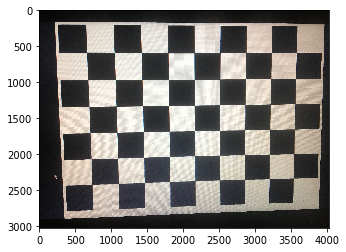

In [8]:

# Let's the first chessboard image to see what it looks like
cal_img_path = cal_imgs_paths[11]
cal_img = load_image(cal_img_path)
plt.imshow(cal_img)

In [9]:
#Our chessboard has 7 inner corners in the x direction, and 7 in the y direction. We will use these as parameters to findChessboardCorners().
cx = 9
cy = 6

In [10]:
def findChessboardCorners(img, nx, ny):
    """
    Finds the chessboard corners of the supplied image (must be grayscale)
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    """
    return cv2.findChessboardCorners(img, (nx, ny), None)

In [11]:
def showChessboardCorners(img, nx, ny, ret, corners):
    """
    Draws the chessboard corners of a given image
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    ret and corners should represent the results from cv2.findChessboardCorners()
    """
    c_img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.axis('off')
    plt.imshow(img)

In [12]:
def to_grayscale(img):
    """
    Returns the grayscaled version of the supplied image (in RGB format)
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

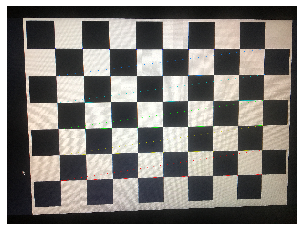

In [13]:
ret, corners = findChessboardCorners(to_grayscale(cal_img), cx, cy)
showChessboardCorners(cal_img, cx, cy, ret, corners)

In [14]:
def findImgObjPoints(imgs_paths, nx, ny):
    """
    Returns the objects and image points computed for a set of chessboard pictures taken from the same camera
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    """
    objpts = []
    imgpts = []
    
    # Pre-compute what our object points in the real world should be (the z dimension is 0 as we assume a flat surface)
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    
    for img_path in imgs_paths:
        img = load_image(img_path)
        gray = to_grayscale(img)
        ret, corners = findChessboardCorners(gray, nx, ny)
        
        if ret:
            # Found the corners of an image
            imgpts.append(corners)
            # Add the same object point since they don't change in the real world
            objpts.append(objp)
    
    return objpts, imgpts

In [15]:
opts, ipts = findImgObjPoints(cal_imgs_paths, cx, cy)

In [16]:
def undistort_image(img, objpts, imgpts):
    """
    Returns an undistorted image
    The desired object and image points must also be supplied to this function
    """
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpts, imgpts, to_grayscale(img).shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

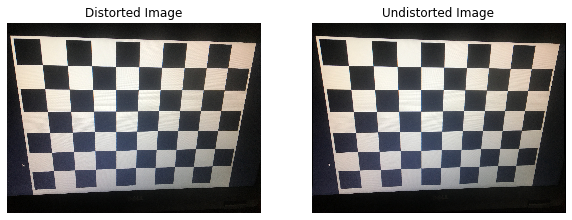

In [17]:
cal_img_example = load_image(cal_imgs_paths[15])
cal_img_undist = undistort_image(cal_img_example, opts, ipts)
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(cal_img_example)
ax[0].axis("off")
ax[0].set_title("Distorted Image")

ax[1].imshow(cal_img_undist)
ax[1].axis("off")
ax[1].set_title("Undistorted Image")

plt.show()

In [18]:
test_imgs_paths = glob.glob(test_imgs_dir + "/*.jpg")

In [19]:
test_imgs_dir

'test_images'

In [20]:
test_imgs_paths

['test_images\\frame1096.jpg',
 'test_images\\frame1188.jpg',
 'test_images\\frame1373.jpg',
 'test_images\\frame1461.jpg',
 'test_images\\frame538.jpg',
 'test_images\\frame794.jpg',
 'test_images\\frame80.jpg',
 'test_images\\frame857.jpg']

In [21]:
test_img_names = np.asarray(list(map(lambda img_path: img_path.split("/")[-1].split(".")[0], test_imgs_paths)))
undist_test_img_names = np.asarray(list(map(lambda img_name: "{0}{1}".format("undistorted_", img_name), test_img_names)))

In [22]:
test_imgs = np.asarray(list(map(lambda img_path: load_image(img_path), test_imgs_paths)))
undist_test_imgs = np.asarray(list(map(lambda img: undistort_image(img, opts, ipts), test_imgs)))

In [23]:
test_img_and_undist = np.asarray(list(zip(test_imgs, undist_test_imgs)))
test_img_and_undist_names = np.asarray(list(zip(test_img_names, undist_test_img_names)))

In [24]:
def show_image_list(img_list, img_labels, title, cols=2, fig_size=(15, 15), show_ticks=True):
    """
    Utility function to to show a list of images
    """
    rows = len(img_list)
    cmap = None

    fig, axes = plt.subplots(rows, cols, figsize=fig_size)

    for i in range(0, rows):
        for j in range(0, cols):
            ax = axes[i, j] if rows > 1 else axes[j]
            #k = i * cols + j
            img_name = img_labels[i][j]
            img = img_list[i][j]
            if len(img.shape) < 3 or img.shape[-1] < 3:
                cmap = "gray"
                img = np.reshape(img, (img.shape[0], img.shape[1]))

            if not show_ticks:
                ax.axis("off")

            ax.imshow(img, cmap=cmap)
            ax.set_title(img_name)

    fig.suptitle(title, fontsize=12, fontweight='bold', y=1)
    fig.tight_layout()
    plt.show()

    return

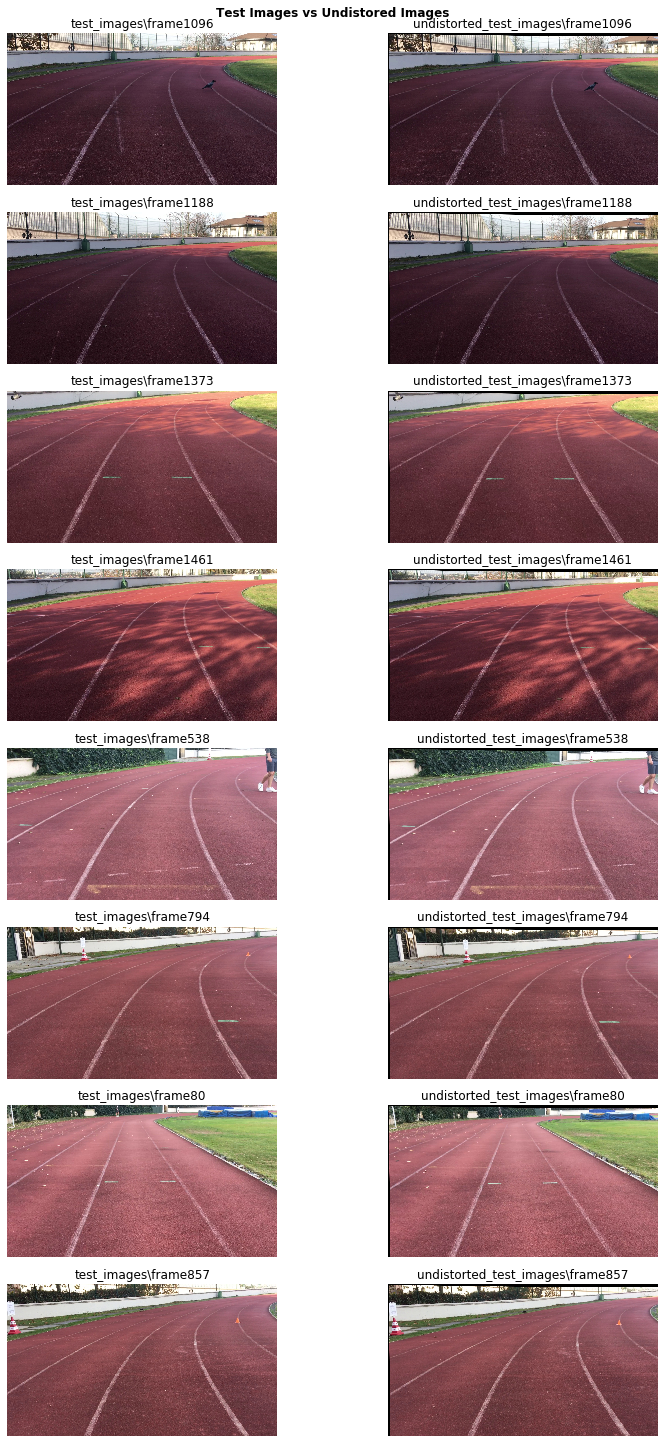

In [25]:
show_image_list(test_img_and_undist, test_img_and_undist_names, "Test Images vs Undistored Images", fig_size=(12, 20), cols=2, show_ticks=False)

**THRESHOLDING**

In [26]:
def threshold_img(img, channel, thres=(0, 255)):
    """
    Applies a threshold mask to the input image
    """
    img_ch = img[:,:,channel]
    if thres is None:  
        return img_ch
    
    mask_ch = np.zeros_like(img_ch)
    mask_ch[ (thres[0] <= img_ch) & (thres[1] >= img_ch) ] = 1
    return mask_ch

In [27]:
test_img_path = test_imgs_paths[7]
test_img = load_image(test_img_path)
undistorted_test_img = undistort_image(test_img, opts, ipts)

In [28]:
rgb_comp = np.asarray([[threshold_img(undistorted_test_img, 0, thres=None), threshold_img(undistorted_test_img, 1, thres=None), threshold_img(undistorted_test_img, 2, thres=None)]])
rgb_lbs = np.asarray([["Red Channel", "Green Channel", "Blue Channel"]])

In [29]:
def to_hls(img):
    """
    Returns the same image in HLS format
    The input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
hls_test_img = to_hls(undistorted_test_img)
hls_comp = np.asarray([[threshold_img(hls_test_img, 0, thres=None), threshold_img(hls_test_img, 1, thres=None), threshold_img(hls_test_img, 2, thres=None)]])
hls_lbs = np.asarray([["Hue Channel", "Lightness Channel", "Saturation Channel"]])

In [30]:
def to_hsv(img):
    """
    Returns the same image in HSV format
    The input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
hsv_test_img = to_hsv(undistorted_test_img)
hsv_comp = np.asarray([[threshold_img(hsv_test_img, 0, thres=None), threshold_img(hsv_test_img, 1, thres=None), threshold_img(hsv_test_img, 2, thres=None)]])
hsv_lbs = np.asarray([["Hue Channel", "Saturation Channel", "Value Channel"]])

In [31]:
def to_lab(img):
    """
    Returns the same image in LAB format
    Th input image must be in RGB format
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2LAB  )
    
lab_test_img = to_lab(undistorted_test_img)
lab_comp = np.asarray([[threshold_img(lab_test_img, 0, thres=None), threshold_img(lab_test_img, 1, thres=None), threshold_img(lab_test_img, 2, thres=None)]])
lab_lbs = np.asarray([["Lightness Channel", "Green-Red (A) Channel", "Blue-Yellow (B) Channel"]])

In [32]:

color_spaces_comps = np.concatenate((rgb_comp, hls_comp, hsv_comp, lab_comp))
color_spaces_lbs = np.concatenate((rgb_lbs, hls_lbs, hsv_lbs, lab_lbs))

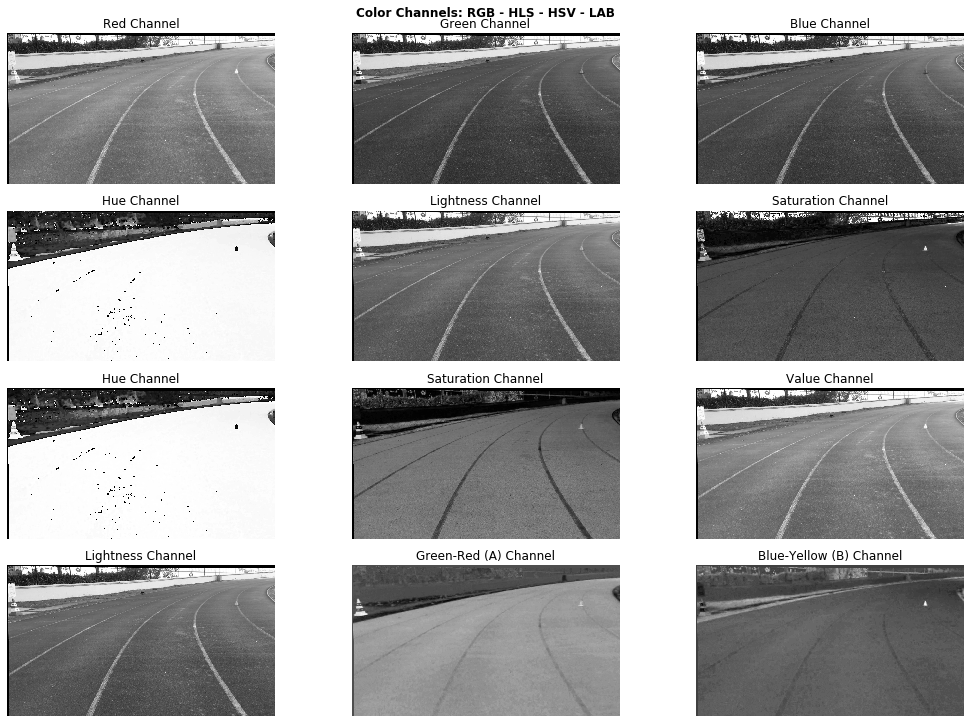

In [33]:
show_image_list(color_spaces_comps, color_spaces_lbs, "Color Channels: RGB - HLS - HSV - LAB", cols=3, fig_size=(15, 10), show_ticks=False)

In [34]:
def compute_hls_white_yellow_binary(rgb_img):
    """
    Returns a binary thresholded image produced retaining only white and yellow elements on the picture
    The provided image should be in RGB format
    """
    hls_img = to_hls(rgb_img)
    hsv_img = to_hsv(rgb_img)
    
    # Compute a binary thresholded image where yellow is isolated from HLS components
    img_hls_yellow_bin = np.zeros_like(hls_img[:,:,0])
    img_hls_yellow_bin[((hls_img[:,:,0] >= 15) & (hls_img[:,:,0] <= 35))
                 & ((hls_img[:,:,1] >= 30) & (hls_img[:,:,1] <= 204))
                 & ((hls_img[:,:,2] >= 115) & (hls_img[:,:,2] <= 255))                
                ] = 1
    
    # Compute a binary thresholded image where white is isolated from HLS components
    img_hls_white_bin = np.zeros_like(hls_img[:,:,0])
    img_hls_white_bin[((hls_img[:,:,0] >= 0) & (hls_img[:,:,0] <= 255))
                 & ((hls_img[:,:,1] >= 0) & (hls_img[:,:,1] <= 255))
                 & ((hls_img[:,:,2] >= 0) & (hls_img[:,:,2] <= 60))                
                ] = 1
    # Compute a binary thresholded image where white is isolated from HLS components
    img_hsv_white_bin = np.zeros_like(hsv_img[:,:,0])
    img_hsv_white_bin[((hsv_img[:,:,0] >= 0) & (hsv_img[:,:,0] <= 255))
                 & ((hsv_img[:,:,1] >= 0) & (hsv_img[:,:,1] <= 80))
                 & ((hsv_img[:,:,2] >= 0) & (hsv_img[:,:,2] <= 255))                
                ] = 1
    
    # Now combine both
    img_hls_white_yellow_bin = np.zeros_like(hls_img[:,:,0])
    img_hls_white_yellow_bin[(img_hls_yellow_bin == 1) | (img_hls_white_bin == 1) | (img_hsv_white_bin == 1)] = 1

    return img_hls_white_yellow_bin

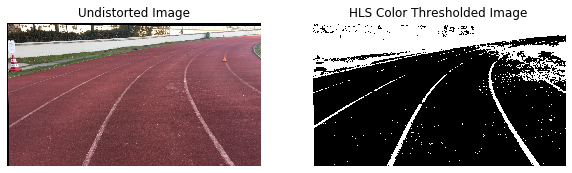

In [35]:

undistorted_yellow_white_hls_img_bin = compute_hls_white_yellow_binary(undistorted_test_img)

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(undistorted_test_img)
ax[0].axis("off")
ax[0].set_title("Undistorted Image")

ax[1].imshow(undistorted_yellow_white_hls_img_bin, cmap='gray')
ax[1].axis("off")
ax[1].set_title("HLS Color Thresholded Image")

plt.show()

**Gradient Thresholding Via Sobel**

In [36]:
# L channel is index 0 of the color components
undist_test_img_gray = to_lab(undistorted_test_img)[:,:,0]

In [37]:
def abs_sobel(gray_img, x_dir=True, kernel_size=3, thres=(0, 255)):
    """
    Applies the sobel operator to a grayscale-like (i.e. single channel) image in either horizontal or vertical direction
    The function also computes the asbolute value of the resulting matrix and applies a binary threshold
    """
    sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size) if x_dir else cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size) 
    sobel_abs = np.absolute(sobel)
    sobel_scaled = np.uint8(255 * sobel / np.max(sobel_abs))
    
    gradient_mask = np.zeros_like(sobel_scaled)
    gradient_mask[(thres[0] <= sobel_scaled) & (sobel_scaled <= thres[1])] = 1
    return gradient_mask

In [44]:
sobx_3x3_thres = np.asarray([[abs_sobel(undist_test_img_gray, thres=(20, 120)), abs_sobel(undist_test_img_gray, thres=(50, 150)), abs_sobel(undist_test_img_gray, thres=(80, 200))]])
sobx_7x7_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=7, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=7, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=7, thres=(80, 200))]])
sobx_11x11_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=11, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=11, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=11, thres=(80, 200))]])
sobx_15x15_thres = np.asarray([[abs_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 120)), abs_sobel(undist_test_img_gray, kernel_size=15, thres=(50, 150)), abs_sobel(undist_test_img_gray, kernel_size=15, thres=(80, 200))]])

sobx_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,120)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
sobx_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,120)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
sobx_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,120)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
sobx_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,120)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

In [45]:
sobx_thres = np.concatenate((sobx_3x3_thres, sobx_7x7_thres, sobx_11x11_thres, sobx_15x15_thres))
sobx_thres_lbs = np.concatenate((sobx_3x3_thres_lbs, sobx_7x7_thres_lbs, sobx_11x11_thres_lbs, sobx_15x15_thres_lbs))

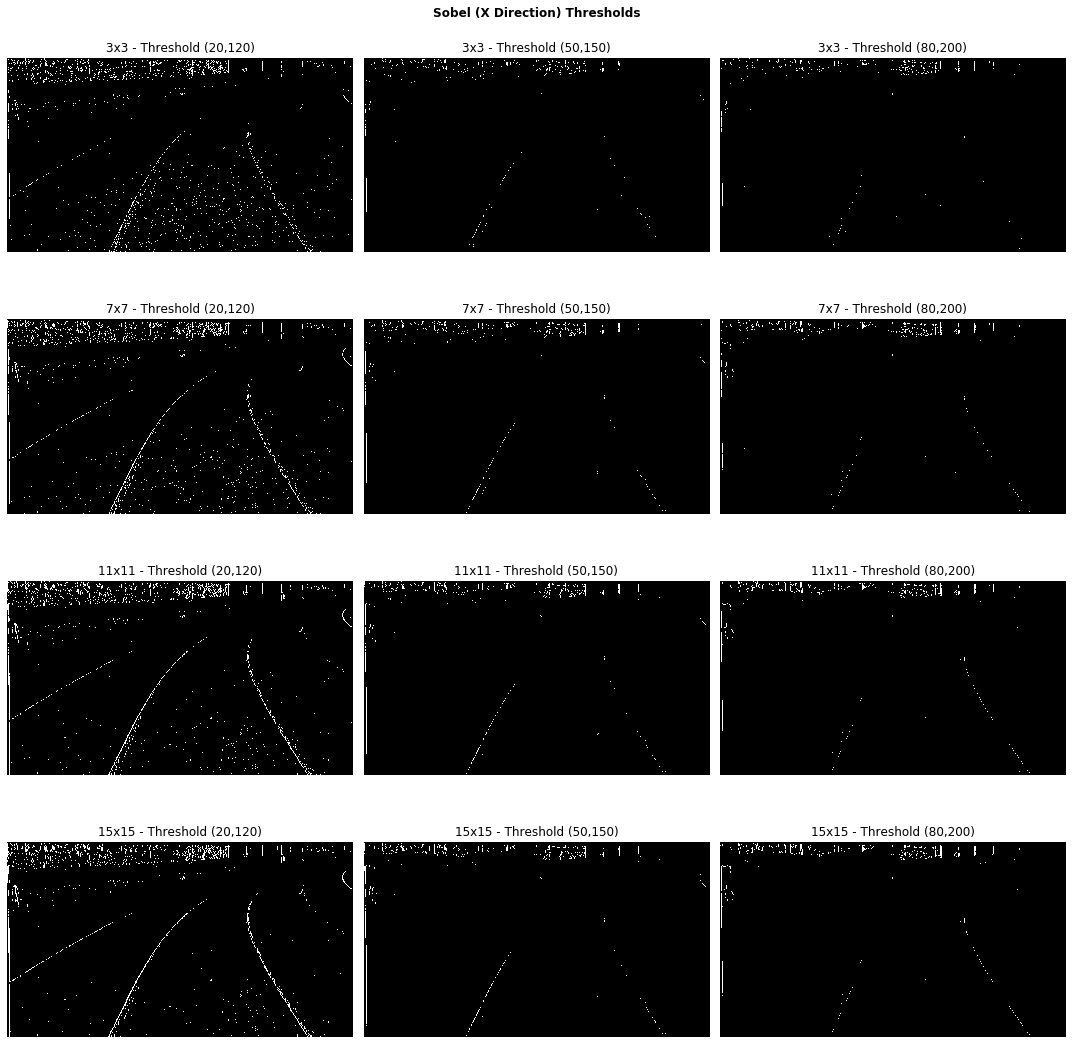

In [46]:
show_image_list(sobx_thres, sobx_thres_lbs, "Sobel (X Direction) Thresholds", cols=3, show_ticks=False)

In [47]:
# Saving our best sobel results
sobx_best = abs_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 120))

In [48]:
soby_3x3_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, thres=(80, 200))]])
soby_7x7_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=7, thres=(80, 200))]])
soby_11x11_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=11, thres=(80, 200))]])
soby_15x15_thres = np.asarray([[abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(20, 120)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(50, 150)), abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(80, 200))]])

soby_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,120)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
soby_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,120)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
soby_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,120)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
soby_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,120)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

In [49]:
soby_thres = np.concatenate((soby_3x3_thres, soby_7x7_thres, soby_11x11_thres, soby_15x15_thres))
soby_thres_lbs = np.concatenate((soby_3x3_thres_lbs, soby_7x7_thres_lbs, soby_11x11_thres_lbs, soby_15x15_thres_lbs))

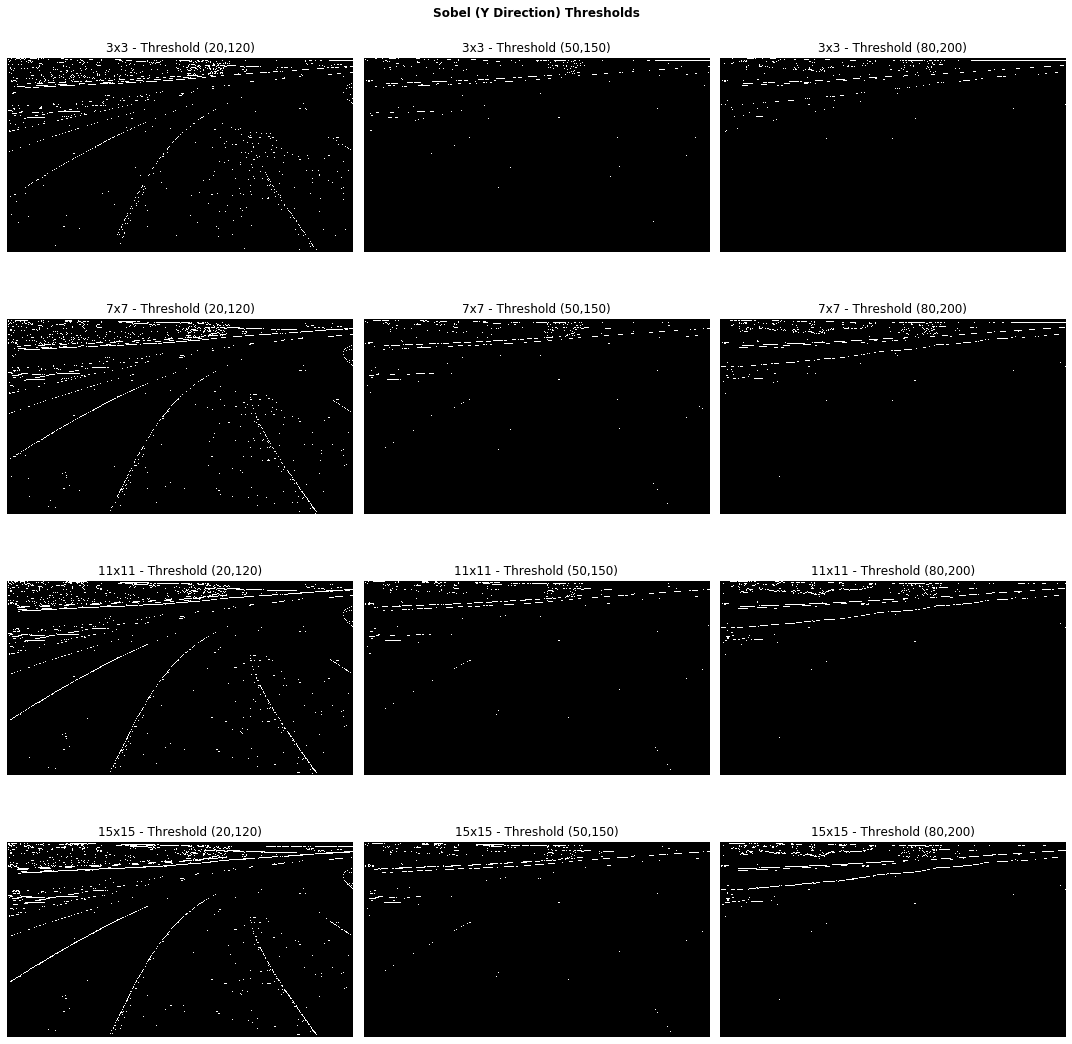

In [50]:
show_image_list(soby_thres, soby_thres_lbs, "Sobel (Y Direction) Thresholds", cols=3, show_ticks=False)

In [51]:
# Saving our best sobel y result
soby_best = abs_sobel(undist_test_img_gray, x_dir=False, kernel_size=15, thres=(20, 120))

In [52]:
def mag_sobel(gray_img, kernel_size=3, thres=(0, 255)):
    """
    Computes sobel matrix in both x and y directions, merges them by computing the magnitude in both directions
    and applies a threshold value to only set pixels within the specified range
    """
    sx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sy = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size)
    
    sxy = np.sqrt(np.square(sx) + np.square(sy))
    scaled_sxy = np.uint8(255 * sxy / np.max(sxy))
    
    sxy_binary = np.zeros_like(scaled_sxy)
    sxy_binary[(scaled_sxy >= thres[0]) & (scaled_sxy <= thres[1])] = 1
    
    return sxy_binary

In [53]:
sobxy_3x3_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=3, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=3, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=3, thres=(80, 200))]])
sobxy_7x7_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=7, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=7, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=7, thres=(80, 200))]])
sobxy_11x11_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=11, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=11, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=11, thres=(80, 200))]])
sobxy_15x15_thres = np.asarray([[mag_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 80)), mag_sobel(undist_test_img_gray, kernel_size=15, thres=(50, 150)), mag_sobel(undist_test_img_gray, kernel_size=15, thres=(80, 200))]])

sobxy_3x3_thres_lbs = np.asarray([["3x3 - Threshold (20,80)", "3x3 - Threshold (50,150)", "3x3 - Threshold (80,200)"]])
sobxy_7x7_thres_lbs = np.asarray([["7x7 - Threshold (20,80)", "7x7 - Threshold (50,150)", "7x7 - Threshold (80,200)"]])
sobxy_11x11_thres_lbs = np.asarray([["11x11 - Threshold (20,80)", "11x11 - Threshold (50,150)", "11x11 - Threshold (80,200)"]])
sobxy_15x15_thres_lbs = np.asarray([["15x15 - Threshold (20,80)", "15x15 - Threshold (50,150)", "15x15 - Threshold (80,200)"]])

In [54]:
sobxy_thres = np.concatenate((sobxy_3x3_thres, sobxy_7x7_thres, sobxy_11x11_thres, sobxy_15x15_thres))
sobxy_thres_lbs = np.concatenate((sobxy_3x3_thres_lbs, sobxy_7x7_thres_lbs, sobxy_11x11_thres_lbs, sobxy_15x15_thres_lbs))

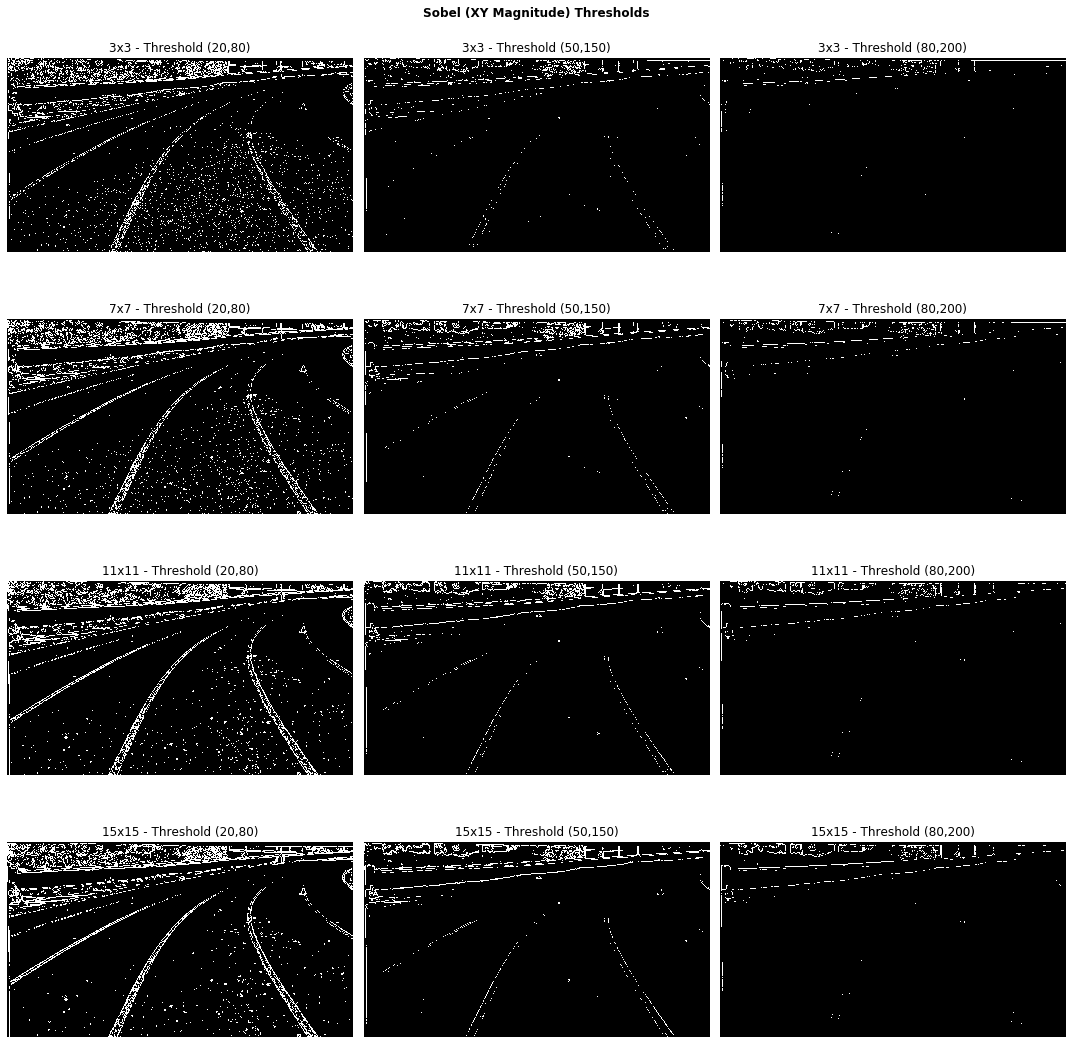

In [55]:
show_image_list(sobxy_thres, sobxy_thres_lbs, "Sobel (XY Magnitude) Thresholds", cols=3, show_ticks=False)

In [56]:
# Saving our best Sobel XY magnitude results
sobxy_best = mag_sobel(undist_test_img_gray, kernel_size=15, thres=(20, 80))

In [57]:
def dir_sobel(gray_img, kernel_size=3, thres=(0, np.pi/2)):
    """
    Computes sobel matrix in both x and y directions, gets their absolute values to find the direction of the gradient
    and applies a threshold value to only set pixels within the specified range
    """
    sx_abs = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=kernel_size))
    sy_abs = np.absolute(cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=kernel_size))
    
    dir_sxy = np.arctan2(sx_abs, sy_abs)

    binary_output = np.zeros_like(dir_sxy)
    binary_output[(dir_sxy >= thres[0]) & (dir_sxy <= thres[1])] = 1
    
    return binary_output

In [58]:
def combined_sobels(sx_binary, sy_binary, sxy_magnitude_binary, gray_img, kernel_size=3, angle_thres=(0, np.pi/2)):
    sxy_direction_binary = dir_sobel(gray_img, kernel_size=kernel_size, thres=angle_thres)
    
    combined = np.zeros_like(sxy_direction_binary)
    # Sobel X returned the best output so we keep all of its results. We perform a binary and on all the other sobels    
    combined[(sx_binary == 1) | ((sy_binary == 1) & (sxy_magnitude_binary == 1) & (sxy_direction_binary == 1))] = 1
    
    return combined

In [59]:
cb = combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray)

In [60]:
sobxy_combined_dir_3x3_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=3, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_7x7_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=7, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_11x11_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=11, angle_thres=(np.pi/3, np.pi/2))
                                           ]])

sobxy_combined_dir_15x15_thres = np.asarray([[combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(0, np.pi/4)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(np.pi/4, np.pi/2)),
                                            combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(np.pi/3, np.pi/2))
                                           ]])


sobxy_combined_dir_3x3_thres_lbs = np.asarray([["3x3 - Combined (0, pi/4)", "3x3 - Combined (pi/4, pi/2)", "3x3 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_7x7_thres_lbs = np.asarray([["7x7 - Combined (0, pi/4)", "7x7 - Combined (pi/4, pi/2)", "7x7 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_11x11_thres_lbs = np.asarray([["11x11 - Combined (0, pi/4)", "11x11 - Combined (pi/4, pi/2)", "11x11 - Combined (pi/3, pi/2)"]])
sobxy_combined_dir_15x15_thres_lbs = np.asarray([["15x15 - Combined (0, pi/4)", "15x15 - Combined (pi/4, pi/2)", "15x15 - Combined (pi/3, pi/2)"]])

In [61]:
sobxy_combined_dir_thres = np.concatenate((sobxy_combined_dir_3x3_thres, sobxy_combined_dir_7x7_thres, sobxy_combined_dir_11x11_thres, sobxy_combined_dir_15x15_thres))
sobxy_combined_dir_thres_lbs = np.concatenate((sobxy_combined_dir_3x3_thres_lbs, sobxy_combined_dir_7x7_thres_lbs, sobxy_combined_dir_11x11_thres_lbs, sobxy_combined_dir_15x15_thres_lbs))

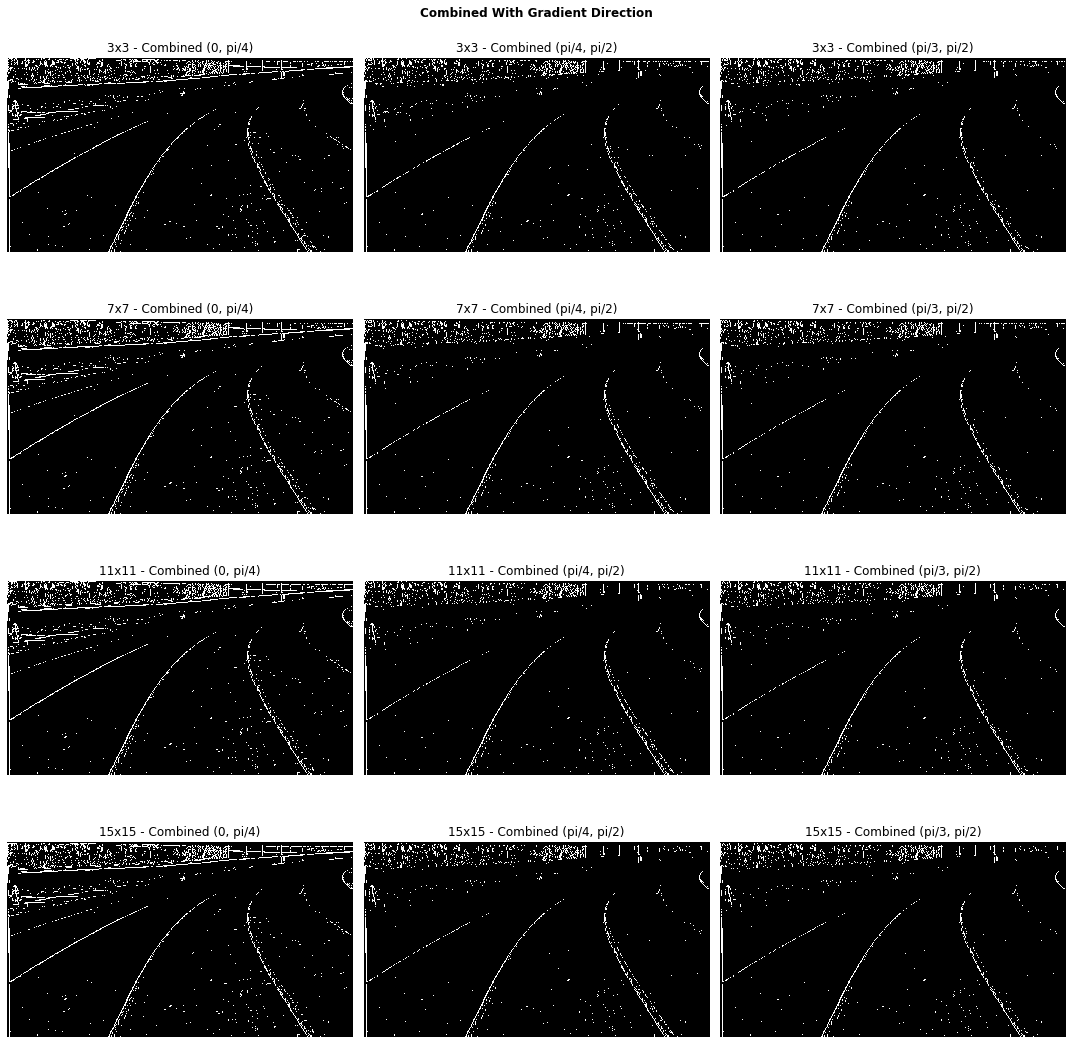

In [62]:
show_image_list(sobxy_combined_dir_thres, sobxy_combined_dir_thres_lbs, "Combined With Gradient Direction", cols=3, show_ticks=False)

In [63]:
sobel_combined_best = combined_sobels(sobx_best, soby_best, sobxy_best, undist_test_img_gray, kernel_size=15, angle_thres=(np.pi/4, np.pi/2))

In [64]:
color_binary = np.dstack((np.zeros_like(sobel_combined_best), sobel_combined_best, undistorted_yellow_white_hls_img_bin)) * 255
color_binary = color_binary.astype(np.uint8)

In [65]:
combined_binary = np.zeros_like(undistorted_yellow_white_hls_img_bin)
combined_binary[(sobel_combined_best == 1) | (undistorted_yellow_white_hls_img_bin == 1)] = 1

In [66]:
combined_binaries = [[color_binary, combined_binary]]
combined_binaries_lbs = np.asarray([["Stacked Thresholds", "Combined Color And Gradient Thresholds"]])

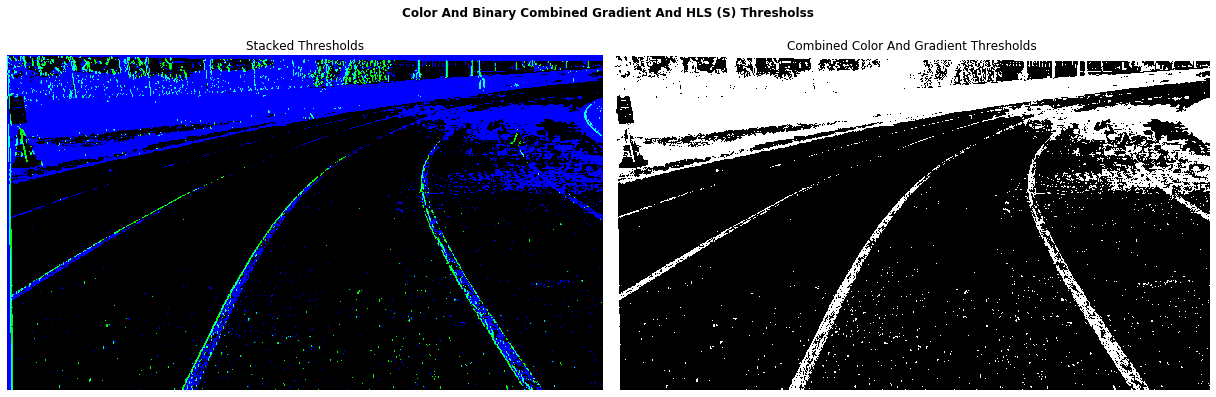

In [67]:
show_image_list(combined_binaries, combined_binaries_lbs, "Color And Binary Combined Gradient And HLS (S) Thresholss", cols=2, fig_size=(17, 6), show_ticks=False)

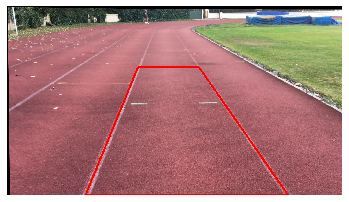

In [75]:

copy_combined = np.copy(undist_test_imgs[6])
(bottom_px, right_px) = (copy_combined.shape[0] - 1, copy_combined.shape[1] - 1) 
pts = np.array([[450,bottom_px],[750,350],[1100,350], [1610, bottom_px]], np.int32)
cv2.polylines(copy_combined,[pts],True,(255,0,0), 10)
plt.axis('off')
plt.imshow(copy_combined)

In [76]:
def compute_perspective_transform_matrices(src, dst):
    """
    Returns the tuple (M, M_inv) where M represents the matrix to use for perspective transform
    and M_inv is the matrix used to revert the transformed image back to the original one
    """
    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    return (M, M_inv)

In [77]:
def perspective_transform(img, src, dst):   
    """
    Applies a perspective 
    """
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

In [78]:
src_pts = pts.astype(np.float32)
dst_pts = np.array([[450, 1080], [450,0], [1610,0],[1610, 1080]], np.float32)

In [79]:

test_img_persp_tr = perspective_transform(undistorted_test_img, src_pts, dst_pts)

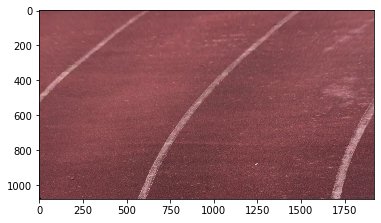

In [80]:
plt.imshow(test_img_persp_tr)

In [81]:
test_imgs_pers_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), undist_test_imgs)))

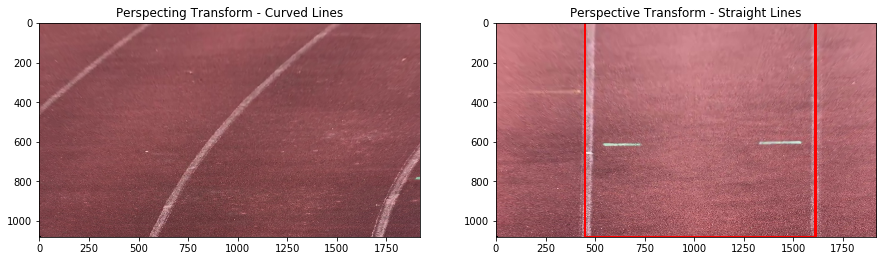

In [83]:
test_persp_img = np.copy(test_imgs_pers_tr[6])
dst = dst_pts.astype(np.int32)
cv2.polylines(test_persp_img,[dst],True,(255,0,0), 10)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
ax[0].imshow(test_imgs_pers_tr[5])
ax[0].set_title("Perspecting Transform - Curved Lines")

ax[1].imshow(test_persp_img)
ax[1].set_title("Perspective Transform - Straight Lines")

plt.show()

In [84]:
test_undist_imgs_and_p_tr = np.asarray(list(zip(undist_test_imgs, test_imgs_pers_tr)))
test_undist_imgs_and_p_tr_names = np.asarray(list(zip(undist_test_img_names, undist_test_img_names)))

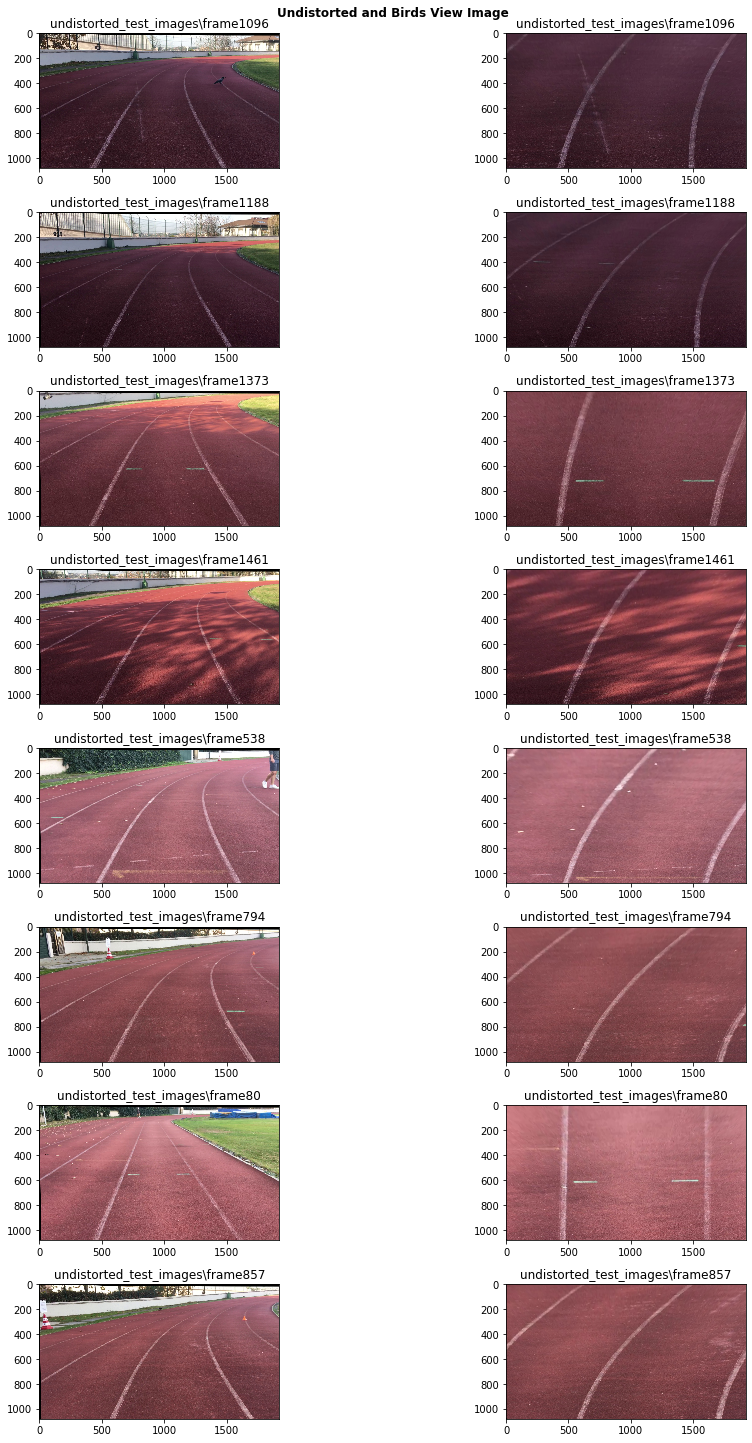

In [85]:
show_image_list(test_undist_imgs_and_p_tr, test_undist_imgs_and_p_tr_names, "Undistorted and Birds View Image", fig_size=(15, 20))

In [86]:
def get_combined_binary_thresholded_img(undist_img):
    """
    Applies a combination of binary Sobel and color thresholding to an undistorted image
    Those binary images are then combined to produce the returned binary image
    """
    undist_img_gray = to_lab(undist_img)[:,:,0]
    sx = abs_sobel(undist_img_gray, kernel_size=15, thres=(20, 120))
    sy = abs_sobel(undist_img_gray, x_dir=False, kernel_size=15, thres=(20, 120))
    sxy = mag_sobel(undist_img_gray, kernel_size=15, thres=(80, 200))
    sxy_combined_dir = combined_sobels(sx, sy, sxy, undist_img_gray, kernel_size=15, angle_thres=(np.pi/4, np.pi/2))   
    
    hls_w_y_thres = compute_hls_white_yellow_binary(undist_img)
    
    combined_binary = np.zeros_like(hls_w_y_thres)
    combined_binary[(sxy_combined_dir == 1) | (hls_w_y_thres == 1)] = 1
        
    return combined_binary

In [87]:

test_imgs_combined_binary_thres = np.asarray(list(map(lambda img: get_combined_binary_thresholded_img(img), undist_test_imgs)))

In [88]:
test_imgs_psp_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), undist_test_imgs)))

In [89]:
test_imgs_combined_binary_psp_tr = np.asarray(list(map(lambda img: perspective_transform(img, src_pts, dst_pts), test_imgs_combined_binary_thres)))

In [90]:
test_imgs_combined_binary_and_psp_tr = np.asarray(list(zip(test_imgs_psp_tr[:,:,:,0],test_imgs_combined_binary_thres, test_imgs_combined_binary_psp_tr)))
test_imgs_combined_binary_and_psp_tr_names = np.asarray(list(zip(undist_test_img_names,undist_test_img_names, undist_test_img_names)))

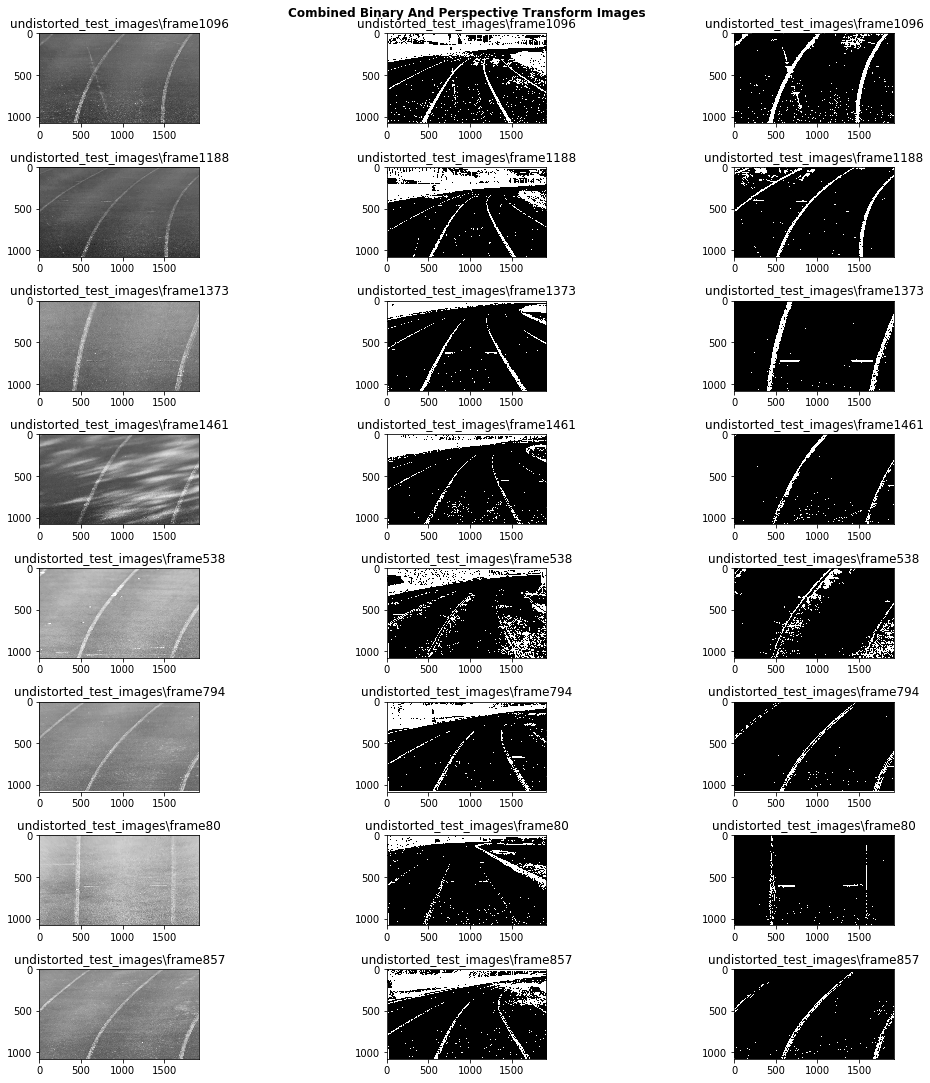

In [91]:
show_image_list(test_imgs_combined_binary_and_psp_tr, test_imgs_combined_binary_and_psp_tr_names, "Combined Binary And Perspective Transform Images", cols=3, fig_size=(15, 15))

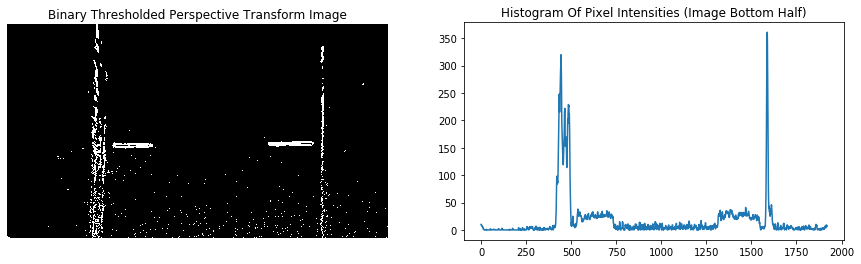

In [92]:

img_example = test_imgs_combined_binary_and_psp_tr[6][2]
histogram = np.sum(img_example[img_example.shape[0]//2:,:], axis=0)

fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].imshow(img_example, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Binary Thresholded Perspective Transform Image")

ax[1].plot(histogram)
ax[1].set_title("Histogram Of Pixel Intensities (Image Bottom Half)")

plt.show()

**Pipeline** **Definition**

In [93]:
from collections import deque

def create_queue(length = 10):
    return deque(maxlen=length)

In [94]:
class LaneLine:
    def __init__(self):
        
        self.polynomial_coeff = None
        self.line_fit_x = None
        self.non_zero_x = []
        self.non_zero_y = []
        self.windows = []

In [95]:
import math

class LaneLineHistory:
    def __init__(self, queue_depth=2, test_points=[50, 300, 500, 700], poly_max_deviation_distance=150):
        self.lane_lines = create_queue(queue_depth)
        self.smoothed_poly = None
        self.test_points = test_points
        self.poly_max_deviation_distance = poly_max_deviation_distance
    
    def append(self, lane_line, force=False):
        if len(self.lane_lines) == 0 or force:
            self.lane_lines.append(lane_line)
            self.get_smoothed_polynomial()
            return True
        
        test_y_smooth = np.asarray(list(map(lambda x: self.smoothed_poly[0] * x**2 + self.smoothed_poly[1] * x + self.smoothed_poly[2], self.test_points)))
        test_y_new = np.asarray(list(map(lambda x: lane_line.polynomial_coeff[0] * x**2 + lane_line.polynomial_coeff[1] * x + lane_line.polynomial_coeff[2], self.test_points)))
        
        dist = np.absolute(test_y_smooth - test_y_new)
        
        #dist = np.absolute(self.smoothed_poly - lane_line.polynomial_coeff)
        #dist_max = np.absolute(self.smoothed_poly * self.poly_max_deviation_distance)
        max_dist = dist[np.argmax(dist)]
        
        if max_dist > self.poly_max_deviation_distance:
            print("**** MAX DISTANCE BREACHED ****")
            print("y_smooth={0} - y_new={1} - distance={2} - max-distance={3}".format(test_y_smooth, test_y_new, max_dist, self.poly_max_deviation_distance))
            return False
        
        self.lane_lines.append(lane_line)
        self.get_smoothed_polynomial()
        
        return True
    
    def get_smoothed_polynomial(self):
        all_coeffs = np.asarray(list(map(lambda lane_line: lane_line.polynomial_coeff, self.lane_lines)))
        self.smoothed_poly = np.mean(all_coeffs, axis=0)
        
        return self.smoothed_poly

In [96]:
class AdvancedLaneDetectorWithMemory:
    """
    The AdvancedLaneDetectorWithMemory is a class that can detect lines on the road
    """
    def __init__(self, objpts, imgpts, psp_src, psp_dst, sliding_windows_per_line, 
                 sliding_window_half_width, sliding_window_recenter_thres, 
                 small_img_size=(256, 144), small_img_x_offset=20, small_img_y_offset=10,
                 img_dimensions=(1080, 1920), lane_width_px=1000, 
                 lane_center_px_psp=960, real_world_lane_size_meters=(32, 3.7)):
        self.objpts = objpts
        self.imgpts = imgpts
        (self.M_psp, self.M_inv_psp) = compute_perspective_transform_matrices(psp_src, psp_dst)

        self.sliding_windows_per_line = sliding_windows_per_line
        self.sliding_window_half_width = sliding_window_half_width
        self.sliding_window_recenter_thres = sliding_window_recenter_thres
        
        self.small_img_size = small_img_size
        self.small_img_x_offset = small_img_x_offset
        self.small_img_y_offset = small_img_y_offset
        
        self.img_dimensions = img_dimensions
        self.lane_width_px = lane_width_px
        self.lane_center_px_psp = lane_center_px_psp 
        self.real_world_lane_size_meters = real_world_lane_size_meters

        # We can pre-compute some data here
        self.ym_per_px = self.real_world_lane_size_meters[0] / self.img_dimensions[0]
        self.xm_per_px = self.real_world_lane_size_meters[1] / self.lane_width_px
        self.ploty = np.linspace(0, self.img_dimensions[0] - 1, self.img_dimensions[0])
        
        self.previous_left_lane_line = None
        self.previous_right_lane_line = None
        
        self.previous_left_lane_lines = LaneLineHistory()
        self.previous_right_lane_lines = LaneLineHistory()
        
        self.total_img_count = 0
        
    
    def process_image(self, img):
        """
        Attempts to find lane lines on the given image and returns an image with lane area colored in green
        as well as small intermediate images overlaid on top to understand how the algorithm is performing
        """
        # First step - undistort the image using the instance's object and image points
        undist_img = undistort_image(img, self.objpts, self.imgpts)
        
        # Produce binary thresholded image from color and gradients
        thres_img = get_combined_binary_thresholded_img(undist_img)
        
        # Create the undistorted and binary perspective transforms
        img_size = (undist_img.shape[1], undist_img.shape[0])
        undist_img_psp = cv2.warpPerspective(undist_img, self.M_psp, img_size, flags=cv2.INTER_LINEAR)
        thres_img_psp = cv2.warpPerspective(thres_img, self.M_psp, img_size, flags=cv2.INTER_LINEAR)
        
        ll, rl = self.compute_lane_lines(thres_img_psp)
        lcr, rcr, lco = self.compute_lane_curvature(ll, rl)

        drawn_lines = self.draw_lane_lines(thres_img_psp, ll, rl)        
        #plt.imshow(drawn_lines)
        
        drawn_lines_regions = self.draw_lane_lines_regions(thres_img_psp, ll, rl)
        #plt.imshow(drawn_lines_regions)
        
        drawn_lane_area = self.draw_lane_area(thres_img_psp, undist_img, ll, rl)        
        #plt.imshow(drawn_lane_area)
        
        drawn_hotspots = self.draw_lines_hotspots(thres_img_psp, ll, rl)
        
        combined_lane_img = self.combine_images(drawn_lane_area, drawn_lines, drawn_lines_regions, drawn_hotspots, undist_img_psp)
        final_img = self.draw_lane_curvature_text(combined_lane_img, lcr, rcr, lco)
        
        self.total_img_count += 1
        self.previous_left_lane_line = ll
        self.previous_right_lane_line = rl
        
        return final_img
    
    def draw_lane_curvature_text(self, img, left_curvature_meters, right_curvature_meters, center_offset_meters):
        """
        Returns an image with curvature information inscribed
        """
        
        offset_y = self.small_img_size[1] * 1 + self.small_img_y_offset * 5
        offset_x = self.small_img_x_offset
        
        template = "{0:17}{1:17}{2:17}"
        txt_header = template.format("Left Curvature", "Right Curvature", "Center Alignment") 
        print(txt_header)
        txt_values = template.format("{:.4f}m".format(left_curvature_meters), 
                                     "{:.4f}m".format(right_curvature_meters),
                                     "{:.4f}m Right".format(center_offset_meters))
        if center_offset_meters < 0.0:
            txt_values = template.format("{:.4f}m".format(left_curvature_meters), 
                                     "{:.4f}m".format(right_curvature_meters),
                                     "{:.4f}m Left".format(math.fabs(center_offset_meters)))
            
        
        print(txt_values)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, txt_header, (offset_x, offset_y), font, 1, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(img, txt_values, (offset_x, offset_y + self.small_img_y_offset * 5), font, 1, (255,255,255), 2, cv2.LINE_AA)
        
        return img
    
    def combine_images(self, lane_area_img, lines_img, lines_regions_img, lane_hotspots_img, psp_color_img):        
        """
        Returns a new image made up of the lane area image, and the remaining lane images are overlaid as
        small images in a row at the top of the the new image
        """
        small_lines = cv2.resize(lines_img, self.small_img_size)
        small_region = cv2.resize(lines_regions_img, self.small_img_size)
        small_hotspots = cv2.resize(lane_hotspots_img, self.small_img_size)
        small_color_psp = cv2.resize(psp_color_img, self.small_img_size)
                
        lane_area_img[self.small_img_y_offset: self.small_img_y_offset + self.small_img_size[1], self.small_img_x_offset: self.small_img_x_offset + self.small_img_size[0]] = small_lines
        
        start_offset_y = self.small_img_y_offset 
        start_offset_x = 2 * self.small_img_x_offset + self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_region
        
        start_offset_y = self.small_img_y_offset 
        start_offset_x = 3 * self.small_img_x_offset + 2 * self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_hotspots

        start_offset_y = self.small_img_y_offset 
        start_offset_x = 4 * self.small_img_x_offset + 3 * self.small_img_size[0]
        lane_area_img[start_offset_y: start_offset_y + self.small_img_size[1], start_offset_x: start_offset_x + self.small_img_size[0]] = small_color_psp
        
        
        return lane_area_img
    
        
    def draw_lane_area(self, warped_img, undist_img, left_line, right_line):
        """
        Returns an image where the inside of the lane has been colored in bright green
        """
        # Create an image to draw the lines on
        warp_zero = np.zeros_like(warped_img).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_line.line_fit_x, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_line.line_fit_x, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, self.M_inv_psp, (undist_img.shape[1], undist_img.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undist_img, 1, newwarp, 0.3, 0)
        
        return result
        
        
    def draw_lane_lines(self, warped_img, left_line, right_line):
        """
        Returns an image where the computed lane lines have been drawn on top of the original warped binary image
        """
        # Create an output image with 3 colors (RGB) from the binary warped image to draw on and  visualize the result
        out_img = np.dstack((warped_img, warped_img, warped_img))*255
        
        # Now draw the lines
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        pts_left = np.dstack((left_line.line_fit_x, ploty)).astype(np.int32)
        pts_right = np.dstack((right_line.line_fit_x, ploty)).astype(np.int32)

        cv2.polylines(out_img, pts_left, False,  (255, 140,0), 5)
        cv2.polylines(out_img, pts_right, False, (255, 140,0), 5)
        
        for low_pt, high_pt in left_line.windows:
            cv2.rectangle(out_img, low_pt, high_pt, (0, 255, 0), 3)

        for low_pt, high_pt in right_line.windows:            
            cv2.rectangle(out_img, low_pt, high_pt, (0, 255, 0), 3)           
        
        return out_img    
    
    def draw_lane_lines_regions(self, warped_img, left_line, right_line):
        """
        Returns an image where the computed left and right lane areas have been drawn on top of the original warped binary image
        """
        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        margin = self.sliding_window_half_width
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0])
        
        left_line_window1 = np.array([np.transpose(np.vstack([left_line.line_fit_x - margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_line.line_fit_x + margin, 
                                      ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        
        right_line_window1 = np.array([np.transpose(np.vstack([right_line.line_fit_x - margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_line.line_fit_x + margin, 
                                      ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Create RGB image from binary warped image
        region_img = np.dstack((warped_img, warped_img, warped_img)) * 255

        # Draw the lane onto the warped blank image
        cv2.fillPoly(region_img, np.int_([left_line_pts]), (0, 255, 0))
        cv2.fillPoly(region_img, np.int_([right_line_pts]), (0, 255, 0))
        
        return region_img


    def draw_lines_hotspots(self, warped_img, left_line, right_line):
        """
        Returns a RGB image where the portions of the lane lines that were
        identified by our pipeline are colored in yellow (left) and blue (right)
        """
        out_img = np.dstack((warped_img, warped_img, warped_img))*255
        
        out_img[left_line.non_zero_y, left_line.non_zero_x] = [255, 255, 0]
        out_img[right_line.non_zero_y, right_line.non_zero_x] = [0, 0, 255]
        
        return out_img

    def compute_lane_curvature(self, left_line, right_line):
        """
        Returns the triple (left_curvature, right_curvature, lane_center_offset), which are all in meters
        """        
        ploty = self.ploty
        y_eval = np.max(ploty)
        # Define conversions in x and y from pixels space to meters
        
        leftx = left_line.line_fit_x
        rightx = right_line.line_fit_x
        
        # Fit new polynomials: find x for y in real-world space
        left_fit_cr = np.polyfit(ploty * self.ym_per_px, leftx * self.xm_per_px, 2)
        right_fit_cr = np.polyfit(ploty * self.ym_per_px, rightx * self.xm_per_px, 2)
        
        # Now calculate the radii of the curvature
        left_curverad = ((1 + (2 * left_fit_cr[0] * y_eval * self.ym_per_px + left_fit_cr[1])**2)**1.5) / np.absolute(2 * left_fit_cr[0])
        right_curverad = ((1 + (2 *right_fit_cr[0] * y_eval * self.ym_per_px + right_fit_cr[1])**2)**1.5) / np.absolute(2 * right_fit_cr[0])
        
        # Use our computed polynomial to determine the car's center position in image space, then
        left_fit = left_line.polynomial_coeff
        right_fit = right_line.polynomial_coeff
        
        center_offset_img_space = (((left_fit[0] * y_eval**2 + left_fit[1] * y_eval + left_fit[2]) + 
                   (right_fit[0] * y_eval**2 + right_fit[1] * y_eval + right_fit[2])) / 2) - self.lane_center_px_psp
        center_offset_real_world_m = center_offset_img_space * self.xm_per_px
        
        # Now our radius of curvature is in meters        
        return left_curverad, right_curverad, center_offset_real_world_m
        
        
        
    def compute_lane_lines(self, warped_img):
        """
        Returns the tuple (left_lane_line, right_lane_line) which represents respectively the LaneLine instances for
        the computed left and right lanes, for the supplied binary warped image
        """

        # Take a histogram of the bottom half of the image, summing pixel values column wise 
        histogram = np.sum(warped_img[warped_img.shape[0]//2:,:], axis=0)
        
        # Find the peak of the left and right halves of the histogram
        # These will be the starting point for the left and right lines 
        midpoint = np.int(histogram.shape[0]//2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint # don't forget to offset by midpoint!
        

        # Set height of windows
        window_height = np.int(warped_img.shape[0]//self.sliding_windows_per_line)
        # Identify the x and y positions of all nonzero pixels in the image
        # NOTE: nonzero returns a tuple of arrays in y and x directions
        nonzero = warped_img.nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        total_non_zeros = len(nonzeroy)
        non_zero_found_pct = 0.0
        
        # Current positions to be updated for each window
        leftx_current = leftx_base
        rightx_current = rightx_base    


        # Set the width of the windows +/- margin
        margin = self.sliding_window_half_width
        # Set minimum number of pixels found to recenter window
        minpix = self.sliding_window_recenter_thres
        # Create empty lists to receive left and right lane pixel indices
        left_lane_inds = []
        right_lane_inds = []
        
        # Our lane line objects we store the result of this computation
        left_line = LaneLine()
        right_line = LaneLine()
                        
        if self.previous_left_lane_line is not None and self.previous_right_lane_line is not None:
            # We have already computed the lane lines polynomials from a previous image
            left_lane_inds = ((nonzerox > (self.previous_left_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                           + self.previous_left_lane_line.polynomial_coeff[1] * nonzeroy 
                                           + self.previous_left_lane_line.polynomial_coeff[2] - margin)) 
                              & (nonzerox < (self.previous_left_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                            + self.previous_left_lane_line.polynomial_coeff[1] * nonzeroy 
                                            + self.previous_left_lane_line.polynomial_coeff[2] + margin))) 

            right_lane_inds = ((nonzerox > (self.previous_right_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                           + self.previous_right_lane_line.polynomial_coeff[1] * nonzeroy 
                                           + self.previous_right_lane_line.polynomial_coeff[2] - margin)) 
                              & (nonzerox < (self.previous_right_lane_line.polynomial_coeff[0] * (nonzeroy**2) 
                                            + self.previous_right_lane_line.polynomial_coeff[1] * nonzeroy 
                                            + self.previous_right_lane_line.polynomial_coeff[2] + margin))) 
            
            non_zero_found_left = np.sum(left_lane_inds)
            non_zero_found_right = np.sum(right_lane_inds)
            non_zero_found_pct = (non_zero_found_left + non_zero_found_right) / total_non_zeros
           
            print("[Previous lane] Found pct={0}".format(non_zero_found_pct))
            #print(left_lane_inds)
        
        if non_zero_found_pct < 0.85:
            print("Non zeros found below thresholds, begining sliding window - pct={0}".format(non_zero_found_pct))
            left_lane_inds = []
            right_lane_inds = []

            # Step through the windows one by one
            for window in range(self.sliding_windows_per_line):
                # Identify window boundaries in x and y (and right and left)
                # We are moving our windows from the bottom to the top of the screen (highest to lowest y value)
                win_y_low = warped_img.shape[0] - (window + 1)* window_height
                win_y_high = warped_img.shape[0] - window * window_height

                # Defining our window's coverage in the horizontal (i.e. x) direction 
                # Notice that the window's width is twice the margin
                win_xleft_low = leftx_current - margin
                win_xleft_high = leftx_current + margin
                win_xright_low = rightx_current - margin
                win_xright_high = rightx_current + margin

                left_line.windows.append([(win_xleft_low,win_y_low),(win_xleft_high,win_y_high)])
                right_line.windows.append([(win_xright_low,win_y_low),(win_xright_high,win_y_high)])

                # Super crytic and hard to understand...
                # Basically nonzerox and nonzeroy have the same size and any nonzero pixel is identified by
                # (nonzeroy[i],nonzerox[i]), therefore we just return the i indices within the window that are nonzero
                # and can then index into nonzeroy and nonzerox to find the ACTUAL pixel coordinates that are not zero
                good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
                good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
                            
                # Append these indices to the lists
                left_lane_inds.append(good_left_inds)
                right_lane_inds.append(good_right_inds)

                # If you found > minpix pixels, recenter next window on their mean position
                if len(good_left_inds) > minpix:
                    leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
                if len(good_right_inds) > minpix:        
                    rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

            # Concatenate the arrays of indices since we now have a list of multiple arrays (e.g. ([1,3,6],[8,5,2]))
            # We want to create a single array with elements from all those lists (e.g. [1,3,6,8,5,2])
            # These are the indices that are non zero in our sliding windows
            left_lane_inds = np.concatenate(left_lane_inds)
            right_lane_inds = np.concatenate(right_lane_inds)
            
            non_zero_found_left = np.sum(left_lane_inds)
            non_zero_found_right = np.sum(right_lane_inds)
            non_zero_found_pct = (non_zero_found_left + non_zero_found_right) / total_non_zeros
           
            print("[Sliding windows] Found pct={0}".format(non_zero_found_pct))
            
    
        # Extract left and right line pixel positions
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds] 
        
        #print("[LEFT] Number of hot pixels={0}".format(len(leftx)))
        #print("[RIGHT] Number of hot pixels={0}".format(len(rightx)))
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        #print("Poly left {0}".format(left_fit))
        #print("Poly right {0}".format(right_fit))
        left_line.polynomial_coeff = left_fit
        right_line.polynomial_coeff = right_fit
        
        if not self.previous_left_lane_lines.append(left_line):
            left_fit = self.previous_left_lane_lines.get_smoothed_polynomial()
            left_line.polynomial_coeff = left_fit
            self.previous_left_lane_lines.append(left_line, force=True)
            print("**** REVISED Poly left {0}".format(left_fit))            
        #else:
            #left_fit = self.previous_left_lane_lines.get_smoothed_polynomial()
            #left_line.polynomial_coeff = left_fit


        if not self.previous_right_lane_lines.append(right_line):
            right_fit = self.previous_right_lane_lines.get_smoothed_polynomial()
            right_line.polynomial_coeff = right_fit
            self.previous_right_lane_lines.append(right_line, force=True)
            print("**** REVISED Poly right {0}".format(right_fit))
        #else:
            #right_fit = self.previous_right_lane_lines.get_smoothed_polynomial()
            #right_line.polynomial_coeff = right_fit


    
        # Generate x and y values for plotting
        ploty = np.linspace(0, warped_img.shape[0] - 1, warped_img.shape[0] )
        left_fitx = left_fit[0] * ploty**2 + left_fit[1] * ploty + left_fit[2]
        right_fitx = right_fit[0] * ploty**2 + right_fit[1] * ploty + right_fit[2]
        
        
        left_line.polynomial_coeff = left_fit
        left_line.line_fit_x = left_fitx
        left_line.non_zero_x = leftx  
        left_line.non_zero_y = lefty

        right_line.polynomial_coeff = right_fit
        right_line.line_fit_x = right_fitx
        right_line.non_zero_x = rightx
        right_line.non_zero_y = righty

        
        return (left_line, right_line)

In [97]:
ld = AdvancedLaneDetectorWithMemory(opts, ipts, src_pts, dst_pts, 20, 100, 50)

In [98]:
proc_img = ld.process_image(test_img)

Non zeros found below thresholds, begining sliding window - pct=0.0
[Sliding windows] Found pct=30212.995516449027
Left Curvature   Right Curvature  Center Alignment 
258.6619m        427.5801m        0.6291m Right    


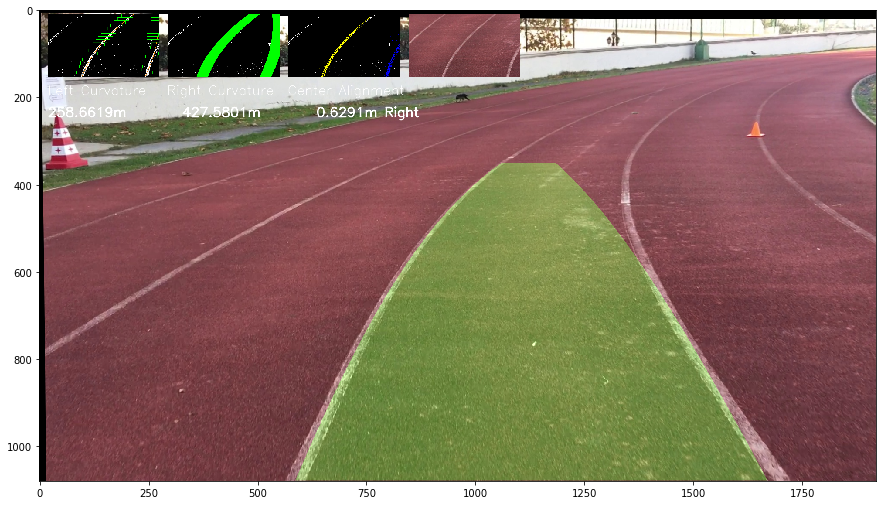

In [99]:
plt.figure(figsize=(15,10))
plt.imshow(proc_img)

In [100]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [101]:
project_video_path = "tartan_vid/yavas_vid.MOV"
challenge_video_path = "challenge_video.mp4"
project_video_output_path = 'output_videos/lanes_project_video.mp4'
project_video_sample_path = 'project_video_sample.mp4'
challenge_video_sample_path = 'challenge_video_sample.mp4'

project_video_sample_output_path = 'output_videos/lanes_project_video_sample.mp4'
challenge_video_sample_output_path = 'output_videos/lanes_challenge_video_sample.mp4'

In [102]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(project_video_path, 22, 27, targetname=project_video_sample_path)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [104]:
detector = AdvancedLaneDetectorWithMemory(opts, ipts, src_pts, dst_pts, 20, 50, 10)

clip1 = VideoFileClip(project_video_sample_path)
project_video_clip = clip1.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time project_video_clip.write_videofile(project_video_sample_output_path, audio=False)

Non zeros found below thresholds, begining sliding window - pct=0.0


t:   1%|          | 2/181 [00:48<03:45,  1.26s/it, now=None]


[Sliding windows] Found pct=74198.48281358762
Left Curvature   Right Curvature  Center Alignment 
885.2468m        5362.1941m       0.8602m Right    
Moviepy - Building video output_videos/lanes_project_video_sample.mp4.
Moviepy - Writing video output_videos/lanes_project_video_sample.mp4



t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]

[Previous lane] Found pct=0.15574180740703356
Non zeros found below thresholds, begining sliding window - pct=0.15574180740703356
[Sliding windows] Found pct=74198.48281358762
Left Curvature   Right Curvature  Center Alignment 
885.2468m        5362.1941m       0.8602m Right    



t:   1%|          | 2/181 [00:02<03:51,  1.29s/it, now=None]

[Previous lane] Found pct=0.1673890049789748
Non zeros found below thresholds, begining sliding window - pct=0.1673890049789748
[Sliding windows] Found pct=70818.60400616332



t:   2%|▏         | 3/181 [00:05<05:12,  1.75s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1015.2998m       3715.7712m       0.9043m Right    
[Previous lane] Found pct=0.17410921097700371
Non zeros found below thresholds, begining sliding window - pct=0.17410921097700371
[Sliding windows] Found pct=66371.27918104235



t:   2%|▏         | 4/181 [00:07<05:48,  1.97s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1128.2993m       3350.4001m       0.8293m Right    
[Previous lane] Found pct=0.1785347831939812
Non zeros found below thresholds, begining sliding window - pct=0.1785347831939812
[Sliding windows] Found pct=63116.66001465815
**** MAX DISTANCE BREACHED ****


t:   3%|▎         | 5/181 [00:10<06:10,  2.10s/it, now=None]


y_smooth=[458.56327412 499.15252031 521.63373197 535.23477891] - y_new=[690.87714238 599.62775522 553.79843079 532.12038219] - distance=232.31386826367003 - max-distance=150
**** REVISED Poly left [-1.11002059e-04  2.01207705e-01  4.48780394e+02]
Left Curvature   Right Curvature  Center Alignment 
1068.8201m       6217.6173m       0.8125m Right    
[Previous lane] Found pct=0.1817478378067199
Non zeros found below thresholds, begining sliding window - pct=0.1817478378067199
[Sliding windows] Found pct=58374.062823821034



t:   3%|▎         | 6/181 [00:12<06:30,  2.23s/it, now=None]

**** MAX DISTANCE BREACHED ****
y_smooth=[460.21079325 500.07157363 522.23337072 535.74909919] - y_new=[737.05165165 624.81695041 566.44566479 536.00013505] - distance=276.84085840535965 - max-distance=150
**** REVISED Poly left [-1.08075858e-04  1.97269672e-01  4.50617499e+02]
Left Curvature   Right Curvature  Center Alignment 
1097.7544m       2327.7586m       0.8278m Right    
[Previous lane] Found pct=0.18672592723302417
Non zeros found below thresholds, begining sliding window - pct=0.18672592723302417
[Sliding windows] Found pct=53297.314450461185
**** MAX DISTANCE BREACHED ****
y_smooth=[459.38703368 499.61204697 521.93355135 535.49193905] - y_new=[786.94972565 650.45916907 577.64693795 537.17267494] - distance=327.56269196809774 - max-distance=150
**** REVISED Poly left [-1.09538958e-04  1.99238689e-01  4.49698947e+02]



t:   4%|▍         | 7/181 [00:15<06:37,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1083.0940m       1723.1674m       0.9343m Right    
[Previous lane] Found pct=0.2032101671359541
Non zeros found below thresholds, begining sliding window - pct=0.2032101671359541
[Sliding windows] Found pct=55773.93381239481
**** MAX DISTANCE BREACHED ****
y_smooth=[459.79891347 499.8418103  522.08346104 535.62051912] - y_new=[775.47224425 643.35903326 573.50557745 535.50733318] - distance=315.67333078157515 - max-distance=150
**** REVISED Poly left [-1.08807408e-04  1.98254180e-01  4.50158223e+02]



t:   4%|▍         | 8/181 [00:17<06:43,  2.33s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1090.3749m       2183.1507m       0.9233m Right    
[Previous lane] Found pct=0.21569119456784522
Non zeros found below thresholds, begining sliding window - pct=0.21569119456784522
[Sliding windows] Found pct=54115.76433533781
**** MAX DISTANCE BREACHED ****
y_smooth=[459.59297357 499.72692864 522.00850619 535.55622908] - y_new=[798.48734337 656.65601116 582.35736851 542.87332419] - distance=338.89436979222864 - max-distance=150
**** REVISED Poly left [-1.09173183e-04  1.98746434e-01  4.49928585e+02]



t:   5%|▍         | 9/181 [00:20<06:53,  2.41s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1086.7222m       1575.1325m       0.9317m Right    
[Previous lane] Found pct=0.21438479709932612
Non zeros found below thresholds, begining sliding window - pct=0.21438479709932612
[Sliding windows] Found pct=51389.68279830794
**** MAX DISTANCE BREACHED ****
y_smooth=[459.69594352 499.78436947 522.04598361 535.5883741 ] - y_new=[818.46795671 700.06209778 640.70946725 612.79866481] - distance=358.77201319469685 - max-distance=150
**** REVISED Poly left [-1.08990296e-04  1.98500307e-01  4.50043404e+02]



t:   6%|▌         | 10/181 [00:22<06:51,  2.41s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1088.5455m       1819.9369m       0.9362m Right    
[Previous lane] Found pct=0.21419191931360668
Non zeros found below thresholds, begining sliding window - pct=0.21419191931360668
[Sliding windows] Found pct=50985.276867956985
**** MAX DISTANCE BREACHED ****
y_smooth=[459.64445855 499.75564905 522.0272449  535.57230159] - y_new=[869.71499428 706.1635462  619.05704929 570.8258071 ] - distance=410.0705357352847 - max-distance=150
**** REVISED Poly left [-1.09081739e-04  1.98623371e-01  4.49985994e+02]



t:   6%|▌         | 11/181 [00:24<06:39,  2.35s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.6331m       1958.3410m       0.9285m Right    
[Previous lane] Found pct=0.21373632734154793
Non zeros found below thresholds, begining sliding window - pct=0.21373632734154793
[Sliding windows] Found pct=45363.75814975246
**** MAX DISTANCE BREACHED ****
y_smooth=[459.67020103 499.77000926 522.03661426 535.58033785] - y_new=[773.30601984 661.0186518  602.25338111 571.10110931] - distance=313.63581881049237 - max-distance=150
**** REVISED Poly left [-1.09036018e-04  1.98561839e-01  4.50014699e+02]



t:   7%|▋         | 12/181 [00:27<06:39,  2.36s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1088.0891m       4546.7841m       0.9117m Right    
[Previous lane] Found pct=0.21053592279920008
Non zeros found below thresholds, begining sliding window - pct=0.21053592279920008
[Sliding windows] Found pct=47313.568499604065
**** MAX DISTANCE BREACHED ****
y_smooth=[459.65732979 499.76282916 522.03192958 535.57631972] - y_new=[972.50226869 796.03305573 704.54873562 657.23423797] - distance=512.8449388990275 - max-distance=150
**** REVISED Poly left [-1.09058879e-04  1.98592605e-01  4.50000347e+02]



t:   7%|▋         | 13/181 [00:29<06:37,  2.37s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.8610m       4565.0427m       0.9163m Right    
[Previous lane] Found pct=0.2092426328532287
Non zeros found below thresholds, begining sliding window - pct=0.2092426328532287
[Sliding windows] Found pct=47115.59485158528
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66376541 499.76641921 522.03427192 535.57832878] - y_new=[983.71655014 805.65774347 711.87313898 661.34403746] - distance=524.0527847266007 - max-distance=150
**** REVISED Poly left [-1.09047448e-04  1.98577222e-01  4.50007523e+02]



t:   8%|▊         | 14/181 [00:32<06:36,  2.37s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9751m       5880.9026m       0.8947m Right    
[Previous lane] Found pct=0.21103165182408767
Non zeros found below thresholds, begining sliding window - pct=0.21103165182408767
[Sliding windows] Found pct=42680.57353362531
**** MAX DISTANCE BREACHED ****
y_smooth=[459.6605476  499.76462418 522.03310075 535.57732425] - y_new=[962.7034513  795.85764371 707.32934443 658.75513117] - distance=503.04290369837673 - max-distance=150
**** REVISED Poly left [-1.09053163e-04  1.98584913e-01  4.50003935e+02]



t:   8%|▊         | 15/181 [00:34<06:24,  2.32s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9180m       9471.3574m       0.8451m Right    
[Previous lane] Found pct=0.21714442258361766
Non zeros found below thresholds, begining sliding window - pct=0.21714442258361766
[Sliding windows] Found pct=42821.2751382213
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66215651 499.76552169 522.03368633 535.57782652] - y_new=[903.37777317 875.76747687 862.26348472 856.38993247] - distance=443.7156166666676 - max-distance=150
**** REVISED Poly left [-1.09050306e-04  1.98581068e-01  4.50005729e+02]



t:   9%|▉         | 16/181 [00:36<06:18,  2.29s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9465m       25200.2053m      0.8527m Right    
[Previous lane] Found pct=0.22395184122290826
Non zeros found below thresholds, begining sliding window - pct=0.22395184122290826
[Sliding windows] Found pct=39655.084190895825
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66135205 499.76507294 522.03339354 535.57757538] - y_new=[886.15122822 757.20470291 692.99902642 663.41694437] - distance=426.48987616391946 - max-distance=150
**** REVISED Poly left [-1.09051734e-04  1.98582991e-01  4.50004832e+02]
Left Curvature   Right Curvature  Center Alignment 


t:   9%|▉         | 17/181 [00:38<06:06,  2.23s/it, now=None]


1087.9323m       7313.4501m       0.9171m Right    
[Previous lane] Found pct=0.2157628269017934
Non zeros found below thresholds, begining sliding window - pct=0.2157628269017934
[Sliding windows] Found pct=44085.11298863296
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66175428 499.76529732 522.03353994 535.57770095] - y_new=[873.87639763 724.08849245 634.29157521 571.19101967] - distance=414.21464335329836 - max-distance=150
**** REVISED Poly left [-1.09051020e-04  1.98582029e-01  4.50005280e+02]
Left Curvature   Right Curvature  Center Alignment 


t:  10%|▉         | 18/181 [00:40<05:53,  2.17s/it, now=None]


1087.9394m       11288.1100m      0.9111m Right    
[Previous lane] Found pct=0.22605870267628453
Non zeros found below thresholds, begining sliding window - pct=0.22605870267628453
[Sliding windows] Found pct=42648.47983057137
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66155317 499.76518513 522.03346674 535.57763817] - y_new=[849.5551797  706.23601146 618.8699065  555.76089453] - distance=389.89362653271 - max-distance=150
**** REVISED Poly left [-1.09051377e-04  1.98582510e-01  4.50005056e+02]



t:  10%|█         | 19/181 [00:42<05:41,  2.11s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9359m       4351.4069m       0.9276m Right    
[Previous lane] Found pct=0.22770004051602144
Non zeros found below thresholds, begining sliding window - pct=0.22770004051602144
[Sliding windows] Found pct=44535.069376346866
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66165372 499.76524122 522.03350334 535.57766956] - y_new=[817.03032016 674.26682385 600.30119919 562.1090611 ] - distance=357.3686664318306 - max-distance=150
**** REVISED Poly left [-1.09051199e-04  1.98582270e-01  4.50005168e+02]



t:  11%|█         | 20/181 [00:44<05:46,  2.15s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9376m       8132.9106m       0.9224m Right    
[Previous lane] Found pct=0.22430107827643594
Non zeros found below thresholds, begining sliding window - pct=0.22430107827643594
[Sliding windows] Found pct=44874.08415311245
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66160344 499.76521317 522.03348504 535.57765386] - y_new=[778.91547459 652.35220856 585.57734537 549.44759298] - distance=319.253871148317 - max-distance=150
**** REVISED Poly left [-1.09051288e-04  1.98582390e-01  4.50005112e+02]



t:  12%|█▏        | 21/181 [00:47<05:49,  2.18s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9367m       3840.9032m       0.9293m Right    
[Previous lane] Found pct=0.22189640840427666
Non zeros found below thresholds, begining sliding window - pct=0.22189640840427666
[Sliding windows] Found pct=43769.2549603004
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66162858 499.7652272  522.03349419 535.57766171] - y_new=[771.20221425 646.11075594 579.87614819 543.72025945] - distance=311.5405856616808 - max-distance=150
**** REVISED Poly left [-1.09051243e-04  1.98582330e-01  4.50005140e+02]
Left Curvature   Right Curvature  Center Alignment 


t:  12%|█▏        | 22/181 [00:49<05:46,  2.18s/it, now=None]


1087.9372m       7530.8540m       0.9273m Right    
[Previous lane] Found pct=0.22243420222305058
Non zeros found below thresholds, begining sliding window - pct=0.22243420222305058
[Sliding windows] Found pct=45883.47460398059
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66161601 499.76522019 522.03348961 535.57765779] - y_new=[773.57270233 644.38897129 574.60557242 534.65647219] - distance=313.9110863166934 - max-distance=150
**** REVISED Poly left [-1.09051266e-04  1.98582360e-01  4.50005126e+02]



t:  13%|█▎        | 23/181 [00:51<05:53,  2.24s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9370m       2760.6383m       0.8995m Right    
[Previous lane] Found pct=0.22775797513853527
Non zeros found below thresholds, begining sliding window - pct=0.22775797513853527
[Sliding windows] Found pct=42621.28147970646
**** MAX DISTANCE BREACHED ****
y_smooth=[459.6616223  499.76522369 522.0334919  535.57765975] - y_new=[749.24710186 629.44851482 564.70337549 527.59710754] - distance=289.58547955937814 - max-distance=150
**** REVISED Poly left [-1.09051255e-04  1.98582345e-01  4.50005133e+02]
Left Curvature   Right Curvature  Center Alignment 


t:  13%|█▎        | 24/181 [00:53<05:46,  2.21s/it, now=None]


1087.9371m       9244.5591m       0.9265m Right    



t:  14%|█▍        | 25/181 [00:55<05:44,  2.21s/it, now=None]

[Previous lane] Found pct=0.22372927881902613
Non zeros found below thresholds, begining sliding window - pct=0.22372927881902613
[Sliding windows] Found pct=41775.072664053805
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66161916 499.76522194 522.03349076 535.57765877] - y_new=[707.43624879 606.40376924 547.67362613 508.58423014] - distance=247.77462962925597 - max-distance=150
**** REVISED Poly left [-1.09051260e-04  1.98582352e-01  4.50005130e+02]
Left Curvature   Right Curvature  Center Alignment 
1087.9370m       2665.3507m       0.9330m Right    
[Previous lane] Found pct=0.21734335109956554
Non zeros found below thresholds, begining sliding window - pct=0.21734335109956554
[Sliding windows] Found pct=45536.05310554486
**** MAX DISTANCE BREACHED ****
y_smooth=[459.66162073 499.76522282 522.03349133 535.57765926] - y_new=[644.2877498  562.94335042 515.92768715 484.96522942] - distance=184.62612906695387 - max-distance=150
**** REVISED Poly left [-1.09051257e-04  1.98582348e-01  4


t:  14%|█▍        | 26/181 [00:58<05:44,  2.22s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1087.9371m       5023.4948m       0.9261m Right    
[Previous lane] Found pct=0.20259991937481484
Non zeros found below thresholds, begining sliding window - pct=0.20259991937481484
[Sliding windows] Found pct=52023.00336585863



t:  15%|█▍        | 27/181 [01:00<05:44,  2.24s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
950.3780m        19612.1368m      0.7142m Right    
[Previous lane] Found pct=0.22540790591425064
Non zeros found below thresholds, begining sliding window - pct=0.22540790591425064
[Sliding windows] Found pct=55208.770267653184



t:  15%|█▌        | 28/181 [01:02<05:46,  2.27s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
731.0049m        3931.6405m       0.7015m Right    
[Previous lane] Found pct=0.21822347122113842
Non zeros found below thresholds, begining sliding window - pct=0.21822347122113842
[Sliding windows] Found pct=59737.19681575079
**** MAX DISTANCE BREACHED ****
y_smooth=[557.52850189 497.07400078 461.63138293 437.67408335] - y_new=[403.29341259 411.14550593 413.46545169 412.26386065] - distance=154.2350893029726 - max-distance=150
**** REVISED Poly left [ 1.43566478e-04 -2.92066272e-01  5.71772899e+02]



t:  16%|█▌        | 29/181 [01:05<05:47,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
826.3630m        706698.3934m     0.6915m Right    
[Previous lane] Found pct=0.21165158007928483
Non zeros found below thresholds, begining sliding window - pct=0.21165158007928483
[Sliding windows] Found pct=56523.009330813555



t:  17%|█▋        | 30/181 [01:07<05:54,  2.35s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
902.9573m        2233.3653m       0.7002m Right    
[Previous lane] Found pct=0.2090898736099627
Non zeros found below thresholds, begining sliding window - pct=0.2090898736099627
[Sliding windows] Found pct=53438.138961543



t:  17%|█▋        | 31/181 [01:10<05:54,  2.36s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
6629.0442m       1401.5833m       0.6705m Right    
[Previous lane] Found pct=0.20152424810031327
Non zeros found below thresholds, begining sliding window - pct=0.20152424810031327
[Sliding windows] Found pct=51877.80730960191



t:  18%|█▊        | 32/181 [01:12<05:52,  2.37s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
2823.3138m       1248.2852m       0.7122m Right    
[Previous lane] Found pct=0.1940051928561988
Non zeros found below thresholds, begining sliding window - pct=0.1940051928561988
[Sliding windows] Found pct=48810.298683026864



t:  18%|█▊        | 33/181 [01:14<05:52,  2.38s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
1903.1466m       1270.5375m       0.7395m Right    
[Previous lane] Found pct=0.19757964484016904
Non zeros found below thresholds, begining sliding window - pct=0.19757964484016904
[Sliding windows] Found pct=48169.64712250172



t:  19%|█▉        | 34/181 [01:17<05:48,  2.37s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
703.7823m        1524.0322m       0.7805m Right    
[Previous lane] Found pct=0.19793967694731054
Non zeros found below thresholds, begining sliding window - pct=0.19793967694731054
[Sliding windows] Found pct=47144.82684618181



t:  19%|█▉        | 35/181 [01:19<05:37,  2.31s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
532.5854m        1480.6202m       0.7910m Right    
[Previous lane] Found pct=0.19343527134080088
Non zeros found below thresholds, begining sliding window - pct=0.19343527134080088
[Sliding windows] Found pct=42866.17286493214
Left Curvature   Right Curvature  Center Alignment 


t:  20%|█▉        | 36/181 [01:21<05:26,  2.25s/it, now=None]


545.9876m        1084.4691m       0.8046m Right    
[Previous lane] Found pct=0.18879982807539097
Non zeros found below thresholds, begining sliding window - pct=0.18879982807539097
[Sliding windows] Found pct=40059.352353346
**** MAX DISTANCE BREACHED ****
y_smooth=[645.98452668 559.23342569 509.63585135 477.64121607] - y_new=[819.83636309 728.55735557 686.60990902 672.28535977] - distance=194.64414369926646 - max-distance=150
**** REVISED Poly left [ 2.20036738e-04 -4.24017262e-01  6.66635298e+02]



t:  20%|██        | 37/181 [01:24<05:40,  2.36s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
539.2023m        758.2897m        0.8106m Right    
[Previous lane] Found pct=0.18186144446984884
Non zeros found below thresholds, begining sliding window - pct=0.18186144446984884
[Sliding windows] Found pct=38047.205467142376
**** MAX DISTANCE BREACHED ****
y_smooth=[649.27878857 562.16938679 512.1619506  479.64792353] - y_new=[818.76511792 725.2581083  682.26570118 667.55169457] - distance=187.90377104315473 - max-distance=150
**** REVISED Poly left [ 2.18667614e-04 -4.24971272e-01  6.69980683e+02]



t:  21%|██        | 38/181 [01:26<05:36,  2.35s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
542.5735m        709.9734m        0.8101m Right    
[Previous lane] Found pct=0.17764616387741794
Non zeros found below thresholds, begining sliding window - pct=0.17764616387741794
[Sliding windows] Found pct=36017.7425804173



t:  22%|██▏       | 39/181 [01:28<05:27,  2.31s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
452.2445m        645.6984m        0.9989m Right    
[Previous lane] Found pct=0.18094554588678569
Non zeros found below thresholds, begining sliding window - pct=0.18094554588678569
[Sliding windows] Found pct=36688.07553041177



t:  22%|██▏       | 40/181 [01:30<05:24,  2.30s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
334.5531m        895.3583m        1.2545m Right    
[Previous lane] Found pct=0.21547452161321773
Non zeros found below thresholds, begining sliding window - pct=0.21547452161321773
[Sliding windows] Found pct=33564.51957967729



t:  23%|██▎       | 41/181 [01:33<05:19,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
210.8648m        1136.9760m       1.0464m Right    
[Previous lane] Found pct=0.21395883712817723
Non zeros found below thresholds, begining sliding window - pct=0.21395883712817723
[Sliding windows] Found pct=34181.941566696034



t:  23%|██▎       | 42/181 [01:35<05:19,  2.30s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
208.0042m        11139.8717m      1.0909m Right    
[Previous lane] Found pct=0.21628204104447815
Non zeros found below thresholds, begining sliding window - pct=0.21628204104447815
[Sliding windows] Found pct=32695.46445924115



t:  24%|██▍       | 43/181 [01:37<05:18,  2.31s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
204.6159m        788.5391m        0.8612m Right    
[Previous lane] Found pct=0.20792890932735256
Non zeros found below thresholds, begining sliding window - pct=0.20792890932735256
[Sliding windows] Found pct=35311.70052520151



t:  24%|██▍       | 44/181 [01:40<05:39,  2.48s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
183.9919m        3184.1192m       1.1277m Right    
[Previous lane] Found pct=0.18811881188118812
Non zeros found below thresholds, begining sliding window - pct=0.18811881188118812
[Sliding windows] Found pct=33291.28663708983



t:  25%|██▍       | 45/181 [01:42<05:28,  2.41s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
199.1033m        83163.5896m      1.1498m Right    
[Previous lane] Found pct=0.1970941658798237
Non zeros found below thresholds, begining sliding window - pct=0.1970941658798237
[Sliding windows] Found pct=31393.45001983767
Left Curvature   Right Curvature  Center Alignment 


t:  25%|██▌       | 46/181 [01:45<05:17,  2.35s/it, now=None]


334.8016m        769.0207m        1.3831m Right    
[Previous lane] Found pct=0.1989530688293167
Non zeros found below thresholds, begining sliding window - pct=0.1989530688293167
[Sliding windows] Found pct=30228.326947469424
Left Curvature   Right Curvature  Center Alignment 


t:  26%|██▌       | 47/181 [01:47<05:10,  2.31s/it, now=None]


330.3095m        572.8789m        1.3718m Right    
[Previous lane] Found pct=0.20381075147535702
Non zeros found below thresholds, begining sliding window - pct=0.20381075147535702
[Sliding windows] Found pct=28904.478361430574



t:  27%|██▋       | 48/181 [01:49<05:01,  2.27s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
360.3028m        555.1286m        1.3577m Right    
[Previous lane] Found pct=0.2041494338599227
Non zeros found below thresholds, begining sliding window - pct=0.2041494338599227
[Sliding windows] Found pct=28315.98072411689



t:  27%|██▋       | 49/181 [01:51<05:00,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
174.3183m        615.8769m        1.1214m Right    
[Previous lane] Found pct=0.22887247628415666
Non zeros found below thresholds, begining sliding window - pct=0.22887247628415666
[Sliding windows] Found pct=31305.102409096213



t:  28%|██▊       | 50/181 [01:54<05:00,  2.29s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
186.1278m        1162.8826m       1.0059m Right    
[Previous lane] Found pct=0.23431470906004012
Non zeros found below thresholds, begining sliding window - pct=0.23431470906004012
[Sliding windows] Found pct=30860.33090883367
**** MAX DISTANCE BREACHED ****
y_smooth=[1003.75968421  781.85040686  663.76355031  598.51275183] - y_new=[723.67568291 630.21626978 582.83683275 559.8023677 ] - distance=280.0840013016294 - max-distance=150
**** REVISED Poly left [ 6.60450726e-04 -1.11879486e+00  1.05804830e+03]



t:  28%|██▊       | 51/181 [01:56<05:08,  2.37s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
180.0253m        734.4396m        1.0101m Right    
[Previous lane] Found pct=0.22736237788786517
Non zeros found below thresholds, begining sliding window - pct=0.22736237788786517
[Sliding windows] Found pct=32165.700356497986
**** MAX DISTANCE BREACHED ****
y_smooth=[996.12740754 776.24850115 658.80230496 593.31782337] - y_new=[732.21909756 622.50031058 560.93609533 522.67038172] - distance=263.9083099868419 - max-distance=150
**** REVISED Poly left [ 6.49521433e-04 -1.10684813e+00  1.04984601e+03]



t:  29%|██▊       | 52/181 [01:58<05:00,  2.33s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
183.0247m        730.4408m        0.9930m Right    
[Previous lane] Found pct=0.23362439512313807
Non zeros found below thresholds, begining sliding window - pct=0.23362439512313807
[Sliding windows] Found pct=31071.816219560915
**** MAX DISTANCE BREACHED ****
y_smooth=[999.94354588 779.049454   661.28292763 595.9152876 ] - y_new=[715.1309732  597.60663507 531.26251682 489.51871168] - distance=284.8125726759421 - max-distance=150
**** REVISED Poly left [ 6.54986079e-04 -1.11282150e+00  1.05394716e+03]



t:  29%|██▉       | 53/181 [02:01<04:57,  2.32s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
181.5123m        642.3455m        1.0939m Right    
[Previous lane] Found pct=0.22415870117520775
Non zeros found below thresholds, begining sliding window - pct=0.22415870117520775
[Sliding windows] Found pct=37033.58977402992
**** MAX DISTANCE BREACHED ****
y_smooth=[998.03547671 777.64897757 660.0426163  594.61655549] - y_new=[746.54964239 604.285258   521.18558992 465.38533468] - distance=251.48583431860163 - max-distance=150
**** REVISED Poly left [ 6.52253756e-04 -1.10983481e+00  1.05189658e+03]



t:  30%|██▉       | 54/181 [02:03<04:50,  2.29s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.2653m        1077.4923m       1.0009m Right    
[Previous lane] Found pct=0.22153481599908642
Non zeros found below thresholds, begining sliding window - pct=0.22153481599908642
[Sliding windows] Found pct=37821.13553258915
**** MAX DISTANCE BREACHED ****
y_smooth=[998.9895113  778.34921579 660.66277196 595.26592155] - y_new=[690.81978764 566.43878186 492.58305931 441.52652081] - distance=308.1697236543084 - max-distance=150
**** REVISED Poly left [ 6.53619918e-04 -1.11132815e+00  1.05292187e+03]



t:  30%|███       | 55/181 [02:05<04:47,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
181.8880m        1213.5174m       1.0173m Right    
[Previous lane] Found pct=0.22659862860787752
Non zeros found below thresholds, begining sliding window - pct=0.22659862860787752
[Sliding windows] Found pct=37174.719403893825
**** MAX DISTANCE BREACHED ****
y_smooth=[998.512494   777.99909668 660.35269413 594.94123852] - y_new=[655.2615593  534.61119847 464.08617733 416.66806066] - distance=343.25093470588024 - max-distance=150
**** REVISED Poly left [ 6.52936837e-04 -1.11058148e+00  1.05240923e+03]



t:  31%|███       | 56/181 [02:08<04:45,  2.28s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0765m        1401.5062m       1.0398m Right    
[Previous lane] Found pct=0.2249939713004849
Non zeros found below thresholds, begining sliding window - pct=0.2249939713004849
[Sliding windows] Found pct=36685.75841620979
**** MAX DISTANCE BREACHED ****
y_smooth=[998.75100265 778.17415624 660.50773305 595.10358003] - y_new=[634.84502827 516.57297154 447.45799948 401.01207037] - distance=363.9059743782153 - max-distance=150
**** REVISED Poly left [ 6.53278377e-04 -1.11095482e+00  1.05266555e+03]



t:  31%|███▏      | 57/181 [02:10<04:44,  2.30s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
181.9822m        1089.9162m       1.0293m Right    
[Previous lane] Found pct=0.2135337684241402
Non zeros found below thresholds, begining sliding window - pct=0.2135337684241402
[Sliding windows] Found pct=32912.718331011216
**** MAX DISTANCE BREACHED ****
y_smooth=[998.63174833 778.08662646 660.43021359 595.02240927] - y_new=[620.32007662 504.52621678 436.95585486 391.66524935] - distance=378.31167170781725 - max-distance=150
**** REVISED Poly left [ 6.53107607e-04 -1.11076815e+00  1.05253739e+03]



t:  32%|███▏      | 58/181 [02:12<04:50,  2.36s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0293m        2248.7045m       1.0728m Right    
[Previous lane] Found pct=0.21144443545996064
Non zeros found below thresholds, begining sliding window - pct=0.21144443545996064
[Sliding windows] Found pct=37753.391329074686
**** MAX DISTANCE BREACHED ****
y_smooth=[998.69137549 778.13039135 660.46897332 595.06299465] - y_new=[644.89462261 515.31137549 442.09228851 395.93765549] - distance=353.7967528798936 - max-distance=150
**** REVISED Poly left [ 6.53192992e-04 -1.11086148e+00  1.05260147e+03]



t:  33%|███▎      | 59/181 [02:15<04:48,  2.36s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0057m        2977.9626m       1.0630m Right    
[Previous lane] Found pct=0.2262421076232103
Non zeros found below thresholds, begining sliding window - pct=0.2262421076232103
[Sliding windows] Found pct=41003.17754623324
**** MAX DISTANCE BREACHED ****
y_smooth=[998.66156191 778.1085089  660.44959345 595.04270196] - y_new=[605.62219086 507.76103651 449.13905994 407.99881397] - distance=393.03937104800923 - max-distance=150
**** REVISED Poly left [ 6.53150299e-04 -1.11081482e+00  1.05256943e+03]



t:  33%|███▎      | 60/181 [02:17<04:39,  2.31s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0175m        2132.8526m       1.0758m Right    
[Previous lane] Found pct=0.21415018913855444
Non zeros found below thresholds, begining sliding window - pct=0.21415018913855444
[Sliding windows] Found pct=40771.49926850515
**** MAX DISTANCE BREACHED ****
y_smooth=[998.6764687  778.11945012 660.45928339 595.05284831] - y_new=[559.1338622  485.31566383 441.19275063 410.34241121] - distance=439.54260649359173 - max-distance=150
**** REVISED Poly left [ 6.53171646e-04 -1.11083815e+00  1.05258545e+03]



t:  34%|███▎      | 61/181 [02:19<04:41,  2.35s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0116m        2706.7941m       1.0680m Right    
[Previous lane] Found pct=0.19895855175788077
Non zeros found below thresholds, begining sliding window - pct=0.19895855175788077
[Sliding windows] Found pct=44235.33946361099
**** MAX DISTANCE BREACHED ****
y_smooth=[998.6690153  778.11397951 660.45443842 595.04777514] - y_new=[546.90531645 478.7163396  440.01037978 415.38906143] - distance=451.76369885492215 - max-distance=150
**** REVISED Poly left [ 6.53160973e-04 -1.11082648e+00  1.05257744e+03]



t:  34%|███▍      | 62/181 [02:22<04:42,  2.38s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0146m        3173.5582m       1.0604m Right    
[Previous lane] Found pct=0.19342550205884382
Non zeros found below thresholds, begining sliding window - pct=0.19342550205884382
[Sliding windows] Found pct=39606.33272296473
**** MAX DISTANCE BREACHED ****
y_smooth=[998.672742   778.11671482 660.4568609  595.05031172] - y_new=[609.2178961  519.12447994 466.43317115 430.97157271] - distance=389.454845898112 - max-distance=150
**** REVISED Poly left [ 6.53166309e-04 -1.11083232e+00  1.05258144e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1875.33320823 1868.75610981 1867.14918277 1868.7909239 ] - y_new=[1662.50347373 1621.47902329 1598.60731922 1584.57815406] - distance=284.21276984341193 - max-distance=150
**** REVISED Poly right [ 4.06083522e-05 -4.05213169e-02  1.87725775e+03]



t:  35%|███▍      | 63/181 [02:24<04:40,  2.38s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0131m        2921.6481m       1.0642m Right    
[Previous lane] Found pct=0.19068658982822073
Non zeros found below thresholds, begining sliding window - pct=0.19068658982822073
[Sliding windows] Found pct=38127.32552909914
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67087865 778.11534717 660.45564966 595.04904343] - y_new=[625.9198113  541.6511938  488.34200507 447.57122101] - distance=372.7510673547283 - max-distance=150
**** REVISED Poly left [ 6.53163641e-04 -1.11082940e+00  1.05257944e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1874.54873379 1868.22669688 1866.67875245 1868.25052812] - y_new=[1649.80131475 1622.06853663 1603.88086179 1589.24745153] - distance=279.00307658972315 - max-distance=150
**** REVISED Poly right [ 3.89965012e-05 -3.89369231e-02  1.87639809e+03]



t:  35%|███▌      | 64/181 [02:27<04:45,  2.44s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0138m        3042.3968m       1.0623m Right    
[Previous lane] Found pct=0.19829013892621225
Non zeros found below thresholds, begining sliding window - pct=0.19829013892621225
[Sliding windows] Found pct=37974.32366120253
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67181033 778.11603099 660.45625528 595.04967758] - y_new=[607.97855609 549.52138804 507.41414749 469.4477904 ] - distance=390.69325423106307 - max-distance=150
**** REVISED Poly left [ 6.53164975e-04 -1.11083086e+00  1.05258044e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1874.94097101 1868.49140334 1866.91396761 1868.52072601] - y_new=[1659.37648466 1632.88434466 1615.61118731 1601.82296743] - distance=266.69775857818536 - max-distance=150
**** REVISED Poly right [ 3.98024267e-05 -3.97291200e-02  1.87682792e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0135m        2980.7999m       1.0633m Right    



t:  36%|███▌      | 65/181 [02:29<04:38,  2.40s/it, now=None]

[Previous lane] Found pct=0.20421448246004806
Non zeros found below thresholds, begining sliding window - pct=0.20421448246004806
[Sliding windows] Found pct=34910.92252116025
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67134449 778.11568908 660.45595247 595.0493605 ] - y_new=[626.86650822 565.90396941 521.45198248 480.838257  ] - distance=371.80483626400746 - max-distance=150
**** REVISED Poly left [ 6.53164308e-04 -1.11083013e+00  1.05257994e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  36%|███▋      | 66/181 [02:31<04:21,  2.28s/it, now=None]


182.0137m        2806.0467m       1.0456m Right    
[Previous lane] Found pct=0.20509424674066665
Non zeros found below thresholds, begining sliding window - pct=0.20509424674066665
[Sliding windows] Found pct=34732.70595652105
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67157741 778.11586004 660.45610388 595.04951904] - y_new=[645.07753525 578.39989275 530.83679591 488.41060323] - distance=353.5940421570907 - max-distance=150
**** REVISED Poly left [ 6.53164642e-04 -1.11083049e+00  1.05258019e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1866.45193704 1868.89613257 1870.73999522 1872.48475228] - y_new=[1633.87584608 1627.85795889 1619.37556391 1607.63264873] - distance=264.85210355846766 - max-distance=150
**** REVISED Poly right [-1.23881976e-06  1.02103690e-02  1.86594452e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  37%|███▋      | 67/181 [02:33<04:08,  2.18s/it, now=None]


182.0136m        95766.4041m      1.0544m Right    



t:  38%|███▊      | 68/181 [02:35<03:55,  2.08s/it, now=None]

[Previous lane] Found pct=0.20043852053236785
Non zeros found below thresholds, begining sliding window - pct=0.20043852053236785
[Sliding windows] Found pct=33750.371856915524
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67146095 778.11577456 660.45602817 595.04943977] - y_new=[688.1095513  601.4991368  543.22500146 494.74126278] - distance=310.56190965096255 - max-distance=150
**** REVISED Poly left [ 6.53164475e-04 -1.11083031e+00  1.05258007e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1862.20742005 1869.09849718 1872.65300902 1874.46676542] - y_new=[1648.26930451 1645.9051845  1638.14865563 1625.17858642] - distance=249.28817900234503 - max-distance=150
**** REVISED Poly right [-2.17594430e-05  3.51801136e-02  1.86050281e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0136m        5452.2324m       1.0500m Right    
[Previous lane] Found pct=0.2067333212387537
Non zeros found below thresholds, begining sliding window - pct=0.2067333212387537
[Sliding windows] Found 


t:  38%|███▊      | 69/181 [02:37<03:55,  2.11s/it, now=None]


182.0136m        10317.0548m      1.0522m Right    
[Previous lane] Found pct=0.2278265905119075
Non zeros found below thresholds, begining sliding window - pct=0.2278265905119075
[Sliding windows] Found pct=31383.66110557683
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149006 778.11579593 660.4560471  595.04945959] - y_new=[644.1569653  593.24559167 552.3362771  511.26677084] - distance=354.5145247599544 - max-distance=150
**** REVISED Poly left [ 6.53164516e-04 -1.11083036e+00  1.05258010e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1863.2685493  1869.04790603 1872.17475557 1873.97126214] - y_new=[1719.75370441 1708.16010643 1703.28662663 1702.32550111] - distance=171.64576102520618 - max-distance=150
**** REVISED Poly right [-1.66292872e-05  2.89376774e-02  1.86186324e+03]



t:  39%|███▊      | 70/181 [02:39<03:59,  2.16s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0136m        7134.2378m       1.0511m Right    
[Previous lane] Found pct=0.22768908094816206
Non zeros found below thresholds, begining sliding window - pct=0.22768908094816206
[Sliding windows] Found pct=30992.040396333196
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67150462 778.11580661 660.45605656 595.0494695 ] - y_new=[673.6877277  613.10062077 566.68276635 522.0887618 ] - distance=324.9837769190258 - max-distance=150
**** REVISED Poly left [ 6.53164537e-04 -1.11083038e+00  1.05258011e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1863.79911392 1869.02261045 1871.93562884 1873.7235105 ] - y_new=[1757.76403673 1732.26851787 1718.94169897 1711.89896558] - distance=161.82454491553722 - max-distance=150
**** REVISED Poly right [-1.40642093e-05  2.58164594e-02  1.86254345e+03]



t:  39%|███▉      | 71/181 [02:41<03:56,  2.15s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0136m        8435.3987m       1.0517m Right    
[Previous lane] Found pct=0.23430150495506735
Non zeros found below thresholds, begining sliding window - pct=0.23430150495506735
[Sliding windows] Found pct=30115.826291464473
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149734 778.11580127 660.45605183 595.04946454] - y_new=[718.39767625 637.63359036 581.2660211  532.22618469] - distance=280.2738210959868 - max-distance=150
**** REVISED Poly left [ 6.53164527e-04 -1.11083037e+00  1.05258010e+03]



t:  40%|███▉      | 72/181 [02:44<04:06,  2.26s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
182.0136m        1454.5246m       0.7825m Right    
[Previous lane] Found pct=0.20813719025275298
Non zeros found below thresholds, begining sliding window - pct=0.20813719025275298
[Sliding windows] Found pct=29142.559117365665
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67150098 778.11580394 660.4560542  595.04946702] - y_new=[707.55441055 640.10529708 590.32602196 544.26231631] - distance=291.1170904278715 - max-distance=150
**** REVISED Poly left [ 6.53164532e-04 -1.11083037e+00  1.05258011e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0136m        1123.4170m       0.8628m Right    



t:  40%|████      | 73/181 [02:46<04:09,  2.31s/it, now=None]

[Previous lane] Found pct=0.19495800333097688
Non zeros found below thresholds, begining sliding window - pct=0.19495800333097688
[Sliding windows] Found pct=27490.089005779286
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149916 778.11580261 660.45605301 595.04946578] - y_new=[480.94109274 526.77361936 541.62726878 537.0921432 ] - distance=517.7304064208431 - max-distance=150
**** REVISED Poly left [ 6.53164529e-04 -1.11083037e+00  1.05258011e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  41%|████      | 74/181 [02:49<04:04,  2.29s/it, now=None]


182.0136m        1252.7296m       0.8236m Right    
[Previous lane] Found pct=0.18305534413395672
Non zeros found below thresholds, begining sliding window - pct=0.18305534413395672
[Sliding windows] Found pct=25095.91405893226
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67150007 778.11580327 660.45605361 595.0494664 ] - y_new=[707.0824647  708.24251657 710.27936418 713.30181721] - distance=291.58903536791433 - max-distance=150
**** REVISED Poly left [ 6.53164531e-04 -1.11083037e+00  1.05258011e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0136m        1309.4762m       0.8113m Right    



t:  41%|████▏     | 75/181 [02:51<04:01,  2.28s/it, now=None]

[Previous lane] Found pct=0.17033828002580884
Non zeros found below thresholds, begining sliding window - pct=0.17033828002580884
[Sliding windows] Found pct=24098.574483494198
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149962 778.11580294 660.45605331 595.04946609] - y_new=[700.17372959 712.05345163 718.22892616 721.44590904] - distance=298.4977700259053 - max-distance=150
**** REVISED Poly left [ 6.53164530e-04 -1.11083037e+00  1.05258011e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  42%|████▏     | 76/181 [02:53<03:56,  2.26s/it, now=None]


182.0136m        3007.6962m       0.7960m Right    
[Previous lane] Found pct=0.1472225237940144
Non zeros found below thresholds, begining sliding window - pct=0.1472225237940144
[Sliding windows] Found pct=26034.496750262366
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149984 778.11580311 660.45605346 595.04946624] - y_new=[1035.2380237   960.75429495  932.59552345  932.37293997] - distance=337.32347372250774 - max-distance=150
**** REVISED Poly left [ 6.53164530e-04 -1.11083037e+00  1.05258011e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1785.99122199 1769.82916582 1759.20138689 1750.61971108] - y_new=[1632.65342105 1689.53953191 1722.7378987  1744.99357936] - distance=153.33780093650216 - max-distance=150
**** REVISED Poly right [ 2.55762889e-05 -7.35999258e-02  1.78960728e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0136m        4638.5969m       0.8036m Right    



t:  43%|████▎     | 78/181 [02:57<03:44,  2.18s/it, now=None]

[Previous lane] Found pct=0.11941871171252023
Non zeros found below thresholds, begining sliding window - pct=0.11941871171252023
[Sliding windows] Found pct=24926.600570385806
**** MAX DISTANCE BREACHED ****
y_smooth=[998.67149973 778.11580302 660.45605338 595.04946617] - y_new=[753.37544825 731.69873565 721.46474611 717.54842816] - distance=245.29605148060512 - max-distance=150
**** REVISED Poly left [ 6.53164530e-04 -1.11083037e+00  1.05258011e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1764.41064058 1759.32295669 1754.62864569 1749.37952233] - y_new=[1956.44076831 1850.46160486 1793.77692399 1762.0688208 ] - distance=192.03012773630348 - max-distance=150
**** REVISED Poly right [-6.93515439e-06 -1.79234315e-02  1.76532415e+03]
Left Curvature   Right Curvature  Center Alignment 
182.0136m        17107.0680m      0.7998m Right    


[Previous lane] Found pct=0.13103849976375515
Non zeros found below thresholds, begining sliding window - pct=0.13103849976375515
[Sliding windows] Found pct=23600.90501327859
Left Curvature   Right Curvature  Center Alignment 
339.4203m        333.0483m        0.9049m Right    



t:  44%|████▎     | 79/181 [03:00<03:44,  2.20s/it, now=None]

[Previous lane] Found pct=0.1635296097903898
Non zeros found below thresholds, begining sliding window - pct=0.1635296097903898
[Sliding windows] Found pct=19969.869971385287
**** MAX DISTANCE BREACHED ****
y_smooth=[1701.02967063 1736.860369   1749.14007416 1746.85546506] - y_new=[1980.11693659 1855.41376824 1785.20874688 1741.2770707 ] - distance=279.0872659649806 - max-distance=150
**** REVISED Poly right [-1.82053928e-04  2.07041668e-01  1.69113272e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  44%|████▍     | 80/181 [03:02<03:44,  2.22s/it, now=None]


161.2098m        652.1859m        1.0681m Right    



t:  45%|████▍     | 81/181 [03:04<03:52,  2.33s/it, now=None]

[Previous lane] Found pct=0.17548990579548132
Non zeros found below thresholds, begining sliding window - pct=0.17548990579548132
[Sliding windows] Found pct=16610.593796641508
**** MAX DISTANCE BREACHED ****
y_smooth=[1006.15809062  842.29240711  760.22517789  721.73600877] - y_new=[1617.99951169 1118.24233041  854.05574179  710.41951441] - distance=611.841421068353 - max-distance=150
**** REVISED Poly left [ 5.44725751e-04 -8.46116747e-01  1.04710211e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1669.33918565 1725.62907515 1746.3957884  1745.59343643] - y_new=[1885.93027768 1873.28842564 1868.68498057 1868.97934576] - distance=216.59109203361754 - max-distance=150
**** REVISED Poly right [-2.69613315e-04  3.19524218e-01  1.65403701e+03]
Left Curvature   Right Curvature  Center Alignment 
218.3454m        440.7354m        0.9865m Right    



t:  45%|████▌     | 82/181 [03:07<03:49,  2.31s/it, now=None]

[Previous lane] Found pct=0.1743978115155965
Non zeros found below thresholds, begining sliding window - pct=0.1743978115155965
[Sliding windows] Found pct=17067.658025627057
**** MAX DISTANCE BREACHED ****
y_smooth=[1053.87667757  862.6522816   767.46782143  723.65674489] - y_new=[1583.80688891 1096.22551652  841.05895204  705.80219506] - distance=529.9302113367137 - max-distance=150
**** REVISED Poly left [ 6.42167296e-04 -9.89656137e-01  1.10175407e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1685.18442814 1731.24472208 1747.76793128 1746.22445074] - y_new=[1937.210652   1892.75541098 1872.23196493 1865.07807154] - distance=252.02622385798736 - max-distance=150
**** REVISED Poly right [-2.25833622e-04  2.63282943e-01  1.67258487e+03]
Left Curvature   Right Curvature  Center Alignment 
185.4235m        525.9469m        1.0273m Right    



t:  46%|████▌     | 83/181 [03:09<03:42,  2.27s/it, now=None]

[Previous lane] Found pct=0.17065369910639724
Non zeros found below thresholds, begining sliding window - pct=0.17065369910639724
[Sliding windows] Found pct=18051.746598571826
**** MAX DISTANCE BREACHED ****
y_smooth=[1030.0173841   852.47234436  763.84649966  722.69637683] - y_new=[1475.927707   1042.21961717  813.2245905   689.09307068] - distance=445.9103228992915 - max-distance=150
**** REVISED Poly left [ 5.93446523e-04 -9.17886442e-01  1.07442809e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1677.26180689 1728.43689862 1747.08185984 1745.90894359] - y_new=[1913.96345651 1882.70138132 1868.81429894 1864.81395236] - distance=236.701649620549 - max-distance=150
**** REVISED Poly right [-2.47723468e-04  2.91403581e-01  1.66331094e+03]
Left Curvature   Right Curvature  Center Alignment 
200.5278m        479.5723m        1.0069m Right    
[Previous lane] Found pct=0.18576232597849887
Non zeros found below thresholds, begining sliding window - pct=0.18576232597849887
[Sliding windows]


t:  46%|████▋     | 84/181 [03:11<03:35,  2.22s/it, now=None]

[Previous lane] Found pct=0.18388315207535635
Non zeros found below thresholds, begining sliding window - pct=0.18388315207535635
[Sliding windows] Found pct=22221.824209986375
**** MAX DISTANCE BREACHED ****
y_smooth=[1679.2424622  1729.13885448 1747.2533777  1745.98782038] - y_new=[1859.0515739  1801.13602735 1760.498805   1724.92399591] - distance=179.8091116954231 - max-distance=150
**** REVISED Poly right [-2.42251007e-04  2.84373421e-01  1.66562942e+03]
Left Curvature   Right Curvature  Center Alignment 
137.4377m        490.3794m        0.8961m Right    



t:  47%|████▋     | 85/181 [03:13<03:34,  2.23s/it, now=None]

[Previous lane] Found pct=0.20107698796480664
Non zeros found below thresholds, begining sliding window - pct=0.20107698796480664
[Sliding windows] Found pct=22887.16154819472
Left Curvature   Right Curvature  Center Alignment 


t:  48%|████▊     | 86/181 [03:16<03:38,  2.30s/it, now=None]


168.6316m        8936.6494m       0.8022m Right    
[Previous lane] Found pct=0.18021923100951026
Non zeros found below thresholds, begining sliding window - pct=0.18021923100951026
[Sliding windows] Found pct=20582.287773137712
**** MAX DISTANCE BREACHED ****
y_smooth=[1754.323553   1757.5336385  1749.79811636 1732.90384706] - y_new=[1957.36535415 1897.05817561 1865.69134686 1849.32799728] - distance=203.04180115530562 - max-distance=150
**** REVISED Poly right [-1.14484339e-04  5.29098608e-02  1.75196427e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  48%|████▊     | 87/181 [03:18<03:37,  2.31s/it, now=None]


157.1377m        1037.1879m       0.7629m Right    
[Previous lane] Found pct=0.19239442847667476
Non zeros found below thresholds, begining sliding window - pct=0.19239442847667476
[Sliding windows] Found pct=20762.67082319994
Left Curvature   Right Curvature  Center Alignment 


t:  49%|████▊     | 88/181 [03:20<03:35,  2.32s/it, now=None]


129.7238m        732.3112m        1.1131m Right    
[Previous lane] Found pct=0.228523823256112
Non zeros found below thresholds, begining sliding window - pct=0.228523823256112
[Sliding windows] Found pct=21006.15000251759
Left Curvature   Right Curvature  Center Alignment 
166.0185m        678.1165m        1.0630m Right    



t:  49%|████▉     | 89/181 [03:23<03:33,  2.32s/it, now=None]

[Previous lane] Found pct=0.24670219148110245
Non zeros found below thresholds, begining sliding window - pct=0.24670219148110245
[Sliding windows] Found pct=21404.286170025054
Left Curvature   Right Curvature  Center Alignment 
365.9634m        663.9087m        0.6188m Right    



t:  50%|████▉     | 90/181 [03:25<03:30,  2.32s/it, now=None]

[Previous lane] Found pct=0.2990884170689767
Non zeros found below thresholds, begining sliding window - pct=0.2990884170689767
[Sliding windows] Found pct=19739.217779824303
**** MAX DISTANCE BREACHED ****
y_smooth=[1032.44795499  830.49823611  715.76123169  642.64446787] - y_new=[1209.40154008  936.86109691  773.56241023  658.91587277] - distance=176.953585093926 - max-distance=150
**** REVISED Poly left [ 5.20253008e-04 -9.89887428e-01  1.08064169e+03]
Left Curvature   Right Curvature  Center Alignment 
228.1315m        277.4285m        0.9023m Right    



t:  50%|█████     | 91/181 [03:27<03:27,  2.30s/it, now=None]

[Previous lane] Found pct=0.28404705693514626
Non zeros found below thresholds, begining sliding window - pct=0.28404705693514626
[Sliding windows] Found pct=21949.21760154092
**** MAX DISTANCE BREACHED ****
y_smooth=[1014.54977301  833.60016356  726.8408396   653.85961661] - y_new=[1217.35386453  954.3519845   790.3688982   667.64662767] - distance=202.80409152774666 - max-distance=150
**** REVISED Poly left [ 4.22226262e-04 -8.71577630e-01  1.05707309e+03]
Left Curvature   Right Curvature  Center Alignment 
280.9903m        305.1412m        0.8948m Right    



t:  51%|█████     | 92/181 [03:30<03:24,  2.29s/it, now=None]

[Previous lane] Found pct=0.25353110376507965
Non zeros found below thresholds, begining sliding window - pct=0.25353110376507965
[Sliding windows] Found pct=23264.20099743843
**** MAX DISTANCE BREACHED ****
y_smooth=[1023.498864    832.04919984  721.30103564  648.25204224] - y_new=[1281.61505971  997.83661578  818.94183275  682.82746937] - distance=258.11619571639335 - max-distance=150
**** REVISED Poly left [ 4.71239635e-04 -9.30732529e-01  1.06885739e+03]



t:  51%|█████▏    | 93/181 [03:32<03:31,  2.40s/it, now=None]

Left Curvature   Right Curvature  Center Alignment 
251.7992m        32005.0289m      0.6024m Right    


[Previous lane] Found pct=0.24922632842531814
Non zeros found below thresholds, begining sliding window - pct=0.24922632842531814
[Sliding windows] Found pct=20175.397486781665
**** MAX DISTANCE BREACHED ****
y_smooth=[1019.0243185   832.8246817   724.07093762  651.05582942] - y_new=[1283.30087188 1004.59784601  827.47037646  691.08508571] - distance=264.2765533774517 - max-distance=150
**** REVISED Poly left [ 4.46732948e-04 -9.01155079e-01  1.06296524e+03]
Left Curvature   Right Curvature  Center Alignment 
265.5907m        445.0593m        0.8572m Right    


t:  52%|█████▏    | 95/181 [03:37<03:24,  2.38s/it, now=None]

[Previous lane] Found pct=0.2307046523378289
Non zeros found below thresholds, begining sliding window - pct=0.2307046523378289
[Sliding windows] Found pct=18158.005114850945
**** MAX DISTANCE BREACHED ****
y_smooth=[1021.26159125  832.43694077  722.68598663  649.65393583] - y_new=[1335.87661097 1037.28736442  848.36785404  703.85002087] - distance=314.6150197202153 - max-distance=150
**** REVISED Poly left [ 4.58986292e-04 -9.15943804e-01  1.06591132e+03]
Left Curvature   Right Curvature  Center Alignment 
258.5101m        325.8781m        0.9991m Right    



t:  53%|█████▎    | 96/181 [03:39<03:15,  2.30s/it, now=None]

[Previous lane] Found pct=0.23847534755562977
Non zeros found below thresholds, begining sliding window - pct=0.23847534755562977
[Sliding windows] Found pct=19104.575527073852
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.14295488  832.63081123  723.37846213  650.35488263] - y_new=[1247.10524632 1005.13258635  844.33471989  712.67486368] - distance=226.96229144584777 - max-distance=150
**** REVISED Poly left [ 4.52859620e-04 -9.08549442e-01  1.06443828e+03]
Left Curvature   Right Curvature  Center Alignment 
262.0023m        330.2223m        0.8836m Right    
[Previous lane] Found pct=0.245945426594927
Non zeros found below thresholds, begining sliding window - pct=0.245945426594927
[Sliding windows] Found pct=18139.303410837816
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.70227306  832.533876    723.03222438  650.00440923] - y_new=[1308.71315537 1042.16003383  866.66095706  724.71158736] - distance=288.010882310742 - max-distance=150
**** REVISED Poly left [ 4.55922956e-04 -9.1224


t:  54%|█████▎    | 97/181 [03:41<03:11,  2.28s/it, now=None]

[Previous lane] Found pct=0.2335496225624717
Non zeros found below thresholds, begining sliding window - pct=0.2335496225624717
[Sliding windows] Found pct=18938.062621288675
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.42261397  832.58234362  723.20534325  650.17964593] - y_new=[1316.276534   1045.95163894  868.64855059  725.97375352] - distance=295.8539200351853 - max-distance=150
**** REVISED Poly left [ 4.54391288e-04 -9.10398032e-01  1.06480654e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1984.05026827 1869.49168595 1810.31576979 1780.00292002] - y_new=[2273.53157608 2011.88539201 1876.55371003 1806.98670828] - distance=289.48130780944393 - max-distance=150
**** REVISED Poly right [ 3.60788330e-04 -5.84510245e-01  2.01237381e+03]
Left Curvature   Right Curvature  Center Alignment 
261.1204m        329.1173m        0.9125m Right    



t:  54%|█████▍    | 98/181 [03:44<03:09,  2.29s/it, now=None]


[Previous lane] Found pct=0.2161071686211351
Non zeros found below thresholds, begining sliding window - pct=0.2161071686211351
[Sliding windows] Found pct=22857.570419581592
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.56244352  832.55810981  723.11878382  650.09202758] - y_new=[1327.09499111 1052.90237546  873.36271908  729.2136726 ] - distance=306.5325475927327 - max-distance=150
**** REVISED Poly left [ 4.55157122e-04 -9.11322328e-01  1.06499067e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1983.16181455 1870.57273415 1813.02927212 1784.39941213] - y_new=[2165.34369417 1998.56110696 1886.82341472 1794.36428027] - distance=182.18187962306342 - max-distance=150
**** REVISED Poly right [ 3.61420025e-04 -5.76853330e-01  2.01110093e+03]
Left Curvature   Right Curvature  Center Alignment 
260.6816m        328.5696m        0.9269m Right    


t:  55%|█████▍    | 99/181 [03:46<03:04,  2.25s/it, now=None]

[Previous lane] Found pct=0.21399723418298394
Non zeros found below thresholds, begining sliding window - pct=0.21399723418298394
[Sliding windows] Found pct=22593.954961184274
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.49252874  832.57022671  723.16206354  650.13583675] - y_new=[1332.06428036 1053.87852627  872.46218011  727.60784028] - distance=311.57175161869577 - max-distance=150
**** REVISED Poly left [ 4.54774205e-04 -9.10860180e-01  1.06489860e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1983.60604141 1870.03221005 1811.67252096 1782.20116607] - y_new=[2159.71380535 1997.6940771  1890.13203388 1802.17331454] - distance=176.10776394287745 - max-distance=150
**** REVISED Poly right [ 3.61104178e-04 -5.80681788e-01  2.01173737e+03]
Left Curvature   Right Curvature  Center Alignment 
260.9008m        328.8431m        0.9197m Right    



t:  56%|█████▌    | 101/181 [03:50<02:59,  2.24s/it, now=None]

[Previous lane] Found pct=0.2145431853451461
Non zeros found below thresholds, begining sliding window - pct=0.2145431853451461
[Sliding windows] Found pct=23236.620343380764
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.52748613  832.56416826  723.14042368  650.11393217] - y_new=[1338.28658864 1057.18538221  874.64895966  729.75213051] - distance=317.75910251373193 - max-distance=150
**** REVISED Poly left [ 4.54965663e-04 -9.11091254e-01  1.06494463e+03]
Left Curvature   Right Curvature  Center Alignment 
260.7912m        3646.0381m       0.6816m Right    



t:  56%|█████▋    | 102/181 [03:53<02:58,  2.25s/it, now=None]

[Previous lane] Found pct=0.2709714039028836
Non zeros found below thresholds, begining sliding window - pct=0.2709714039028836
[Sliding windows] Found pct=19964.491122178963
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51000744  832.56719749  723.15124361  650.12488446] - y_new=[1329.50583547 1054.65843504  875.20723058  731.69088468] - distance=308.99582803320664 - max-distance=150
**** REVISED Poly left [ 4.54869934e-04 -9.10975717e-01  1.06492162e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8460m        229.3680m        1.0231m Right    
[Previous lane] Found pct=0.23593279248990995
Non zeros found below thresholds, begining sliding window - pct=0.23593279248990995
[Sliding windows] Found pct=23216.700846996533
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51874678  832.56568287  723.14583364  650.11940831] - y_new=[1205.39749186 1003.35182679  861.56288966  737.41625914] - distance=184.8787450816361 - max-distance=150
**** REVISED Poly left [ 4.54917799e-04 -9.1


t:  57%|█████▋    | 103/181 [03:55<02:56,  2.26s/it, now=None]


260.8186m        11537.7997m      0.7731m Right    



t:  57%|█████▋    | 104/181 [03:57<02:52,  2.23s/it, now=None]

[Previous lane] Found pct=0.2842645757801794
Non zeros found below thresholds, begining sliding window - pct=0.2842645757801794
[Sliding windows] Found pct=24032.54362759554
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51437711  832.56644018  723.14853862  650.12214639] - y_new=[1163.95824544  988.67741528  860.45572224  742.90333685] - distance=156.11097509954197 - max-distance=150
**** REVISED Poly left [ 4.54893867e-04 -9.11004601e-01  1.06492737e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8323m        787.6996m        0.7733m Right    



t:  58%|█████▊    | 105/181 [03:59<02:48,  2.22s/it, now=None]

[Previous lane] Found pct=0.2887902738754825
Non zeros found below thresholds, begining sliding window - pct=0.2887902738754825
[Sliding windows] Found pct=24057.50683156964
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51656195  832.56606153  723.14718613  650.12077735] - y_new=[1207.22908017 1012.34655983  873.15374923  748.81712144] - distance=186.7125182258493 - max-distance=150
**** REVISED Poly left [ 4.54905833e-04 -9.11019043e-01  1.06493025e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8254m        3977.1109m       0.7925m Right    



t:  59%|█████▊    | 106/181 [04:01<02:45,  2.21s/it, now=None]

[Previous lane] Found pct=0.2944926908890873
Non zeros found below thresholds, begining sliding window - pct=0.2944926908890873
[Sliding windows] Found pct=22514.65908250593
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51546953  832.56625085  723.14786238  650.12146187] - y_new=[1187.11543239 1008.6796815   877.42726061  756.39366623] - distance=176.11343064806988 - max-distance=150
**** REVISED Poly left [ 4.54899850e-04 -9.11011822e-01  1.06492881e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8289m        7466.3611m       0.7982m Right    



t:  59%|█████▉    | 107/181 [04:04<02:49,  2.29s/it, now=None]

[Previous lane] Found pct=0.3095144349972865
Non zeros found below thresholds, begining sliding window - pct=0.3095144349972865
[Sliding windows] Found pct=21495.173209326083
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51601574  832.56615619  723.14752426  650.12111961] - y_new=[1187.6919053  1020.00390974  892.98750821  772.31243549] - distance=187.4377535530889 - max-distance=150
**** REVISED Poly left [ 4.54902841e-04 -9.11015433e-01  1.06492953e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8272m        517.8098m        0.7751m Right    



t:  60%|█████▉    | 108/181 [04:06<02:46,  2.28s/it, now=None]

[Previous lane] Found pct=0.3178805737796064
Non zeros found below thresholds, begining sliding window - pct=0.3178805737796064
[Sliding windows] Found pct=20464.723040142333
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51574263  832.56620352  723.14769332  650.12129074] - y_new=[1242.44994921 1053.6812506   914.10508855  784.6967459 ] - distance=221.93420657503884 - max-distance=150
**** REVISED Poly left [ 4.54901345e-04 -9.11013627e-01  1.06492917e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8280m        318.3141m        0.7453m Right    



t:  60%|██████    | 109/181 [04:08<02:43,  2.27s/it, now=None]

[Previous lane] Found pct=0.302468933048667
Non zeros found below thresholds, begining sliding window - pct=0.302468933048667
[Sliding windows] Found pct=17665.58971916571
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51587918  832.56617986  723.14760879  650.12120517] - y_new=[1237.02640272 1052.7669293   916.03698361  788.7982673 ] - distance=220.2007494397484 - max-distance=150
**** REVISED Poly left [ 4.54902093e-04 -9.11014530e-01  1.06492935e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8276m        338.5846m        0.7675m Right    



t:  61%|██████    | 110/181 [04:11<02:42,  2.28s/it, now=None]

[Previous lane] Found pct=0.29022617886690366
Non zeros found below thresholds, begining sliding window - pct=0.29022617886690366
[Sliding windows] Found pct=10852.894418404689
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51581091  832.56619169  723.14765105  650.12124796] - y_new=[1279.3269968  1038.39081097  912.01223224  844.6295379 ] - distance=258.81118589541836 - max-distance=150
**** REVISED Poly left [ 4.54901719e-04 -9.11014079e-01  1.06492926e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8278m        783.3317m        0.9372m Right    



t:  61%|██████▏   | 111/181 [04:13<02:39,  2.28s/it, now=None]

[Previous lane] Found pct=0.20891138235585988
Non zeros found below thresholds, begining sliding window - pct=0.20891138235585988
[Sliding windows] Found pct=15713.535079884887
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51584505  832.56618577  723.14762992  650.12122657] - y_new=[1245.92199527 1059.19166562  920.82856595  792.26205655] - distance=226.6254798422442 - max-distance=150
**** REVISED Poly left [ 4.54901906e-04 -9.11014304e-01  1.06492931e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8277m        718.2254m        0.8907m Right    



t:  62%|██████▏   | 112/181 [04:15<02:36,  2.27s/it, now=None]

[Previous lane] Found pct=0.21036597708594792
Non zeros found below thresholds, begining sliding window - pct=0.21036597708594792
[Sliding windows] Found pct=16001.01039431602
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51582798  832.56618873  723.14764048  650.12123726] - y_new=[1211.71916153 1041.17670448  911.45953072  787.71283865] - distance=208.61051574655698 - max-distance=150
**** REVISED Poly left [ 4.54901813e-04 -9.11014191e-01  1.06492928e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8277m        564.7968m        0.8103m Right    



t:  62%|██████▏   | 113/181 [04:17<02:34,  2.27s/it, now=None]

[Previous lane] Found pct=0.23069308930771873
Non zeros found below thresholds, begining sliding window - pct=0.23069308930771873
[Sliding windows] Found pct=11879.764973839969
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51583651  832.56618725  723.1476352   650.12123191] - y_new=[1519.81945783 1114.39561161  916.05247257  829.70572282] - distance=499.30362131887864 - max-distance=150
**** REVISED Poly left [ 4.54901860e-04 -9.11014248e-01  1.06492929e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8277m        864.3358m        0.7777m Right    
[Previous lane] Found pct=0.24986182606339746
Non zeros found below thresholds, begining sliding window - pct=0.24986182606339746
[Sliding windows] Found pct=12054.796467082091
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51583224  832.56618799  723.14763784  650.12123459] - y_new=[1576.27880847 1130.34045271  905.90812112  799.09210333] - distance=555.7629762269953 - max-distance=150
**** REVISED Poly left [ 4.54901836e-04 -9


t:  63%|██████▎   | 114/181 [04:20<02:37,  2.34s/it, now=None]


260.8277m        654.0297m        0.7286m Right    
[Previous lane] Found pct=0.26061036344083777
Non zeros found below thresholds, begining sliding window - pct=0.26061036344083777
[Sliding windows] Found pct=19661.729293477692
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51583438  832.56618762  723.14763652  650.12123325] - y_new=[1332.94508286 1058.22325842  876.51432739  728.64408838] - distance=312.42924848309985 - max-distance=150
**** REVISED Poly left [ 4.54901848e-04 -9.11014234e-01  1.06492929e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1848.40375223 1847.21674371 1831.89798267 1803.80664009] - y_new=[2147.17057403 1980.81100491 1871.88467601 1784.43508168] - distance=298.76682179796967 - max-distance=150
**** REVISED Poly right [-1.59657269e-04  5.11320101e-02  1.84624629e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8277m        744.5707m        0.7531m Right    



t:  64%|██████▍   | 116/181 [04:25<02:29,  2.30s/it, now=None]

[Previous lane] Found pct=0.24693788276465442
Non zeros found below thresholds, begining sliding window - pct=0.24693788276465442
[Sliding windows] Found pct=16764.27630921135
**** MAX DISTANCE BREACHED ****
y_smooth=[1020.51583331  832.56618781  723.14763718  650.12123392] - y_new=[1375.63590192 1020.57975513  822.37061105  700.45993217] - distance=355.1200686091207 - max-distance=150
**** REVISED Poly left [ 4.54901842e-04 -9.11014227e-01  1.06492929e+03]
Left Curvature   Right Curvature  Center Alignment 
260.8277m        2909.4630m       0.6235m Right    


[Previous lane] Found pct=0.38697334526131993
Non zeros found below thresholds, begining sliding window - pct=0.38697334526131993
[Sliding windows] Found pct=21134.82471248882
Left Curvature   Right Curvature  Center Alignment 
341.8992m        3785.4763m       0.3839m Right    


t:  65%|██████▍   | 117/181 [04:27<02:25,  2.28s/it, now=None]

[Previous lane] Found pct=0.5685286881900964
Non zeros found below thresholds, begining sliding window - pct=0.5685286881900964
[Sliding windows] Found pct=22675.061363927853
**** MAX DISTANCE BREACHED ****
y_smooth=[1929.65616775 1866.76457832 1813.1982304  1756.74025905] - y_new=[2211.42414102 1961.93441641 1813.88601079 1711.65393766] - distance=281.7679732713284 - max-distance=150
**** REVISED Poly right [-3.61452930e-05 -2.38915505e-01  1.94169231e+03]
Left Curvature   Right Curvature  Center Alignment 
368.4896m        3289.9436m       0.3493m Right    



t:  66%|██████▌   | 119/181 [04:31<02:18,  2.24s/it, now=None]

[Previous lane] Found pct=0.48784725792190164
Non zeros found below thresholds, begining sliding window - pct=0.48784725792190164
[Sliding windows] Found pct=23988.410581727705
**** MAX DISTANCE BREACHED ****
y_smooth=[1106.11047825  888.30253736  744.20947659  626.919342  ] - y_new=[947.60119096 771.5665739  655.77401208 562.23490079] - distance=158.5092872904969 - max-distance=150
**** REVISED Poly left [ 3.35036577e-04 -9.88494566e-01  1.15469762e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1917.14258714 1856.38649549 1804.74198076 1750.39556257] - y_new=[2126.6229526  1910.08925461 1781.83712221 1693.56261292] - distance=209.48036546144704 - max-distance=150
**** REVISED Poly right [-3.37737933e-05 -2.31203539e-01  1.92878720e+03]
Left Curvature   Right Curvature  Center Alignment 
354.6860m        3520.2990m       0.3666m Right    


[Previous lane] Found pct=0.2754580423119749
Non zeros found below thresholds, begining sliding window - pct=0.2754580423119749
[Sliding windows] Found pct=26086.59821338192
**** MAX DISTANCE BREACHED ****
y_smooth=[1079.74511698  868.21582346  728.5762405   615.23341473] - y_new=[886.16409054 724.81180264 619.53424551 535.41604234] - distance=193.5810264333212 - max-distance=150
**** REVISED Poly left [ 3.28709465e-04 -9.61165487e-01  1.12698162e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1923.39937744 1861.5755369  1808.97010558 1753.56791081] - y_new=[2090.97569789 1888.15483062 1767.87005517 1684.8936516 ] - distance=167.57632045081436 - max-distance=150
**** REVISED Poly right [-3.49595432e-05 -2.35059522e-01  1.93523975e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  66%|██████▋   | 120/181 [04:33<02:16,  2.24s/it, now=None]


361.4534m        3401.2114m       0.3580m Right    



t:  67%|██████▋   | 121/181 [04:36<02:19,  2.32s/it, now=None]

[Previous lane] Found pct=0.3077347761276431
Non zeros found below thresholds, begining sliding window - pct=0.3077347761276431
[Sliding windows] Found pct=28275.300980879296
**** MAX DISTANCE BREACHED ****
y_smooth=[1092.92779761  878.25918041  736.39285855  621.07637837] - y_new=[866.49656669 708.69689004 606.75831637 526.42078062] - distance=226.4312309261677 - max-distance=150
**** REVISED Poly left [ 3.31873021e-04 -9.74830026e-01  1.14083962e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1920.27098229 1858.98101619 1806.85604317 1751.98173669] - y_new=[2090.60891618 1886.15097053 1766.34004896 1685.42284733] - distance=170.33793388368304 - max-distance=150
**** REVISED Poly right [-3.43666683e-05 -2.33131531e-01  1.93201348e+03]
Left Curvature   Right Curvature  Center Alignment 
358.0371m        3459.7272m       0.3623m Right    



t:  67%|██████▋   | 122/181 [04:38<02:13,  2.26s/it, now=None]

[Previous lane] Found pct=0.4105472516875603
Non zeros found below thresholds, begining sliding window - pct=0.4105472516875603
[Sliding windows] Found pct=28000.28512536162
**** MAX DISTANCE BREACHED ****
y_smooth=[1086.3364573   873.23750194  732.48454952  618.15489655] - y_new=[889.31021925 727.86383354 624.19742136 543.18940598] - distance=197.02623804169468 - max-distance=150
**** REVISED Poly left [ 3.30291243e-04 -9.67997756e-01  1.13391062e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.83517987 1860.27827655 1807.91307438 1752.77482375] - y_new=[2073.69140983 1886.35366494 1773.15422775 1692.55102053] - distance=151.85622996270786 - max-distance=150
**** REVISED Poly right [-3.46631057e-05 -2.34095526e-01  1.93362661e+03]
Left Curvature   Right Curvature  Center Alignment 
359.7370m        3430.2189m       0.3601m Right    
[Previous lane] Found pct=0.5855461556937365
Non zeros found below thresholds, begining sliding window - pct=0.5855461556937365
[Sliding windows] Found


t:  68%|██████▊   | 123/181 [04:40<02:08,  2.22s/it, now=None]


407.4985m        3444.9096m       0.3559m Right    
[Previous lane] Found pct=0.4586749239520386
Non zeros found below thresholds, begining sliding window - pct=0.4586749239520386
[Sliding windows] Found pct=23906.751217449426
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.44413047 1859.95396146 1807.64881658 1752.57655199] - y_new=[2173.98930871 1940.90055834 1800.30205709 1700.47911057] - distance=252.54517824065397 - max-distance=150
**** REVISED Poly right [-3.45889963e-05 -2.33854527e-01  1.93322333e+03]
Left Curvature   Right Curvature  Center Alignment 
340.5089m        3437.5485m       0.3966m Right    



t:  69%|██████▊   | 124/181 [04:42<02:07,  2.24s/it, now=None]

[Previous lane] Found pct=0.4024363377178773
Non zeros found below thresholds, begining sliding window - pct=0.4024363377178773
[Sliding windows] Found pct=20871.031037387416
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.24860578 1859.79180391 1807.51668768 1752.4774161 ] - y_new=[2207.93157081 1960.37199614 1810.28122056 1702.81878646] - distance=286.68296503591523 - max-distance=150
**** REVISED Poly right [-3.45519417e-05 -2.33734028e-01  1.93302169e+03]
Left Curvature   Right Curvature  Center Alignment 
274.7711m        3441.2251m       0.4346m Right    



t:  70%|██████▉   | 126/181 [04:47<02:02,  2.23s/it, now=None]

[Previous lane] Found pct=0.42221208368637164
Non zeros found below thresholds, begining sliding window - pct=0.42221208368637164
[Sliding windows] Found pct=19507.211875122204
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.34636812 1859.87288269 1807.58275213 1752.52698405] - y_new=[2237.75235372 1979.12374754 1821.29558178 1707.08938862] - distance=316.40598559527916 - max-distance=150
**** REVISED Poly right [-3.45704690e-05 -2.33794278e-01  1.93312251e+03]
Left Curvature   Right Curvature  Center Alignment 
241.3063m        3439.3858m       0.4650m Right    



t:  70%|███████   | 127/181 [04:49<01:54,  2.13s/it, now=None]

[Previous lane] Found pct=0.4810104714824855
Non zeros found below thresholds, begining sliding window - pct=0.4810104714824855
[Sliding windows] Found pct=18380.35746558231
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.29748695 1859.8323433  1807.5497199  1752.50220007] - y_new=[2267.93231656 1997.23180907 1831.95484054 1712.26314976] - distance=346.63482960906003 - max-distance=150
**** REVISED Poly right [-3.45612053e-05 -2.33764153e-01  1.93307210e+03]
Left Curvature   Right Curvature  Center Alignment 
220.0977m        3440.3052m       0.4897m Right    



t:  71%|███████   | 128/181 [04:51<01:52,  2.12s/it, now=None]

[Previous lane] Found pct=0.5144280125412725
Non zeros found below thresholds, begining sliding window - pct=0.5144280125412725
[Sliding windows] Found pct=17700.2850642324
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.32192754 1859.85261299 1807.56623601 1752.51459206] - y_new=[2298.51125989 2018.78604631 1847.28937958 1722.26693874] - distance=377.1893323516665 - max-distance=150
**** REVISED Poly right [-3.45658372e-05 -2.33779215e-01  1.93309730e+03]
Left Curvature   Right Curvature  Center Alignment 
219.2653m        3439.8455m       0.5055m Right    



t:  71%|███████▏  | 129/181 [04:53<01:52,  2.17s/it, now=None]

[Previous lane] Found pct=0.5533071327034033
Non zeros found below thresholds, begining sliding window - pct=0.5533071327034033
[Sliding windows] Found pct=17054.530437327536
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.30970724 1859.84247815 1807.55797796 1752.50839607] - y_new=[2299.00656063 2026.30728246 1858.38859966 1735.12835219] - distance=377.69685339020793 - max-distance=150
**** REVISED Poly right [-3.45635212e-05 -2.33771684e-01  1.93308470e+03]
Left Curvature   Right Curvature  Center Alignment 
212.3405m        3440.0753m       0.5198m Right    



t:  72%|███████▏  | 130/181 [04:55<01:51,  2.18s/it, now=None]

[Previous lane] Found pct=0.5953251898316276
Non zeros found below thresholds, begining sliding window - pct=0.5953251898316276
[Sliding windows] Found pct=14439.996262793002
**** MAX DISTANCE BREACHED ****
y_smooth=[1323.41879955 1029.91738903  844.64342638  703.39361107] - y_new=[1509.48163007 1090.77469762  858.95747347  718.82764647] - distance=186.06283052150275 - max-distance=150
**** REVISED Poly left [ 5.50301842e-04 -1.36661129e+00  1.39037361e+03]
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31581739 1859.84754557 1807.56210699 1752.51149406] - y_new=[2084.42084058 1941.19306423 1840.66487762 1752.6291661 ] - distance=163.10502318698218 - max-distance=150
**** REVISED Poly right [-3.45646792e-05 -2.33775450e-01  1.93309100e+03]
Left Curvature   Right Curvature  Center Alignment 
215.7473m        3439.9604m       0.5126m Right    



t:  72%|███████▏  | 131/181 [04:58<01:47,  2.16s/it, now=None]

[Previous lane] Found pct=0.538134795816867
Non zeros found below thresholds, begining sliding window - pct=0.538134795816867
[Sliding windows] Found pct=16960.37144124526
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31276232 1859.84501186 1807.56004247 1752.50994507] - y_new=[2139.0292197  1972.36546561 1860.19269959 1766.82725558] - distance=217.71645738003053 - max-distance=150
**** REVISED Poly right [-3.45641002e-05 -2.33773567e-01  1.93308785e+03]
Left Curvature   Right Curvature  Center Alignment 
197.6524m        3440.0179m       0.5544m Right    



t:  73%|███████▎  | 132/181 [05:00<01:45,  2.15s/it, now=None]

[Previous lane] Found pct=0.5944419615650266
Non zeros found below thresholds, begining sliding window - pct=0.5944419615650266
[Sliding windows] Found pct=17515.876880781158
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31428985 1859.84627871 1807.56107473 1752.51071956] - y_new=[2226.68942225 2019.44200116 1886.10174062 1781.61274794] - distance=305.37513239394366 - max-distance=150
**** REVISED Poly right [-3.45643897e-05 -2.33774508e-01  1.93308943e+03]
Left Curvature   Right Curvature  Center Alignment 
237.2392m        3439.9891m       0.5335m Right    



t:  73%|███████▎  | 133/181 [05:02<01:43,  2.16s/it, now=None]

[Previous lane] Found pct=0.5934134910450259
Non zeros found below thresholds, begining sliding window - pct=0.5934134910450259
[Sliding windows] Found pct=19498.440704681136
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31352609 1859.84564529 1807.5605586  1752.51033232] - y_new=[2348.62044859 2088.72069155 1925.83200365 1802.97097595] - distance=427.3069225030097 - max-distance=150
**** REVISED Poly right [-3.45642450e-05 -2.33774037e-01  1.93308864e+03]
Left Curvature   Right Curvature  Center Alignment 
259.2194m        3440.0035m       0.5354m Right    



t:  74%|███████▍  | 134/181 [05:04<01:40,  2.14s/it, now=None]

[Previous lane] Found pct=0.49858113813485416
Non zeros found below thresholds, begining sliding window - pct=0.49858113813485416
[Sliding windows] Found pct=19245.927409642725
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31390797 1859.845962   1807.56081666 1752.51052594] - y_new=[2396.73825756 2121.824148   1950.14926134 1821.36895334] - distance=475.42434958741546 - max-distance=150
**** REVISED Poly right [-3.45643173e-05 -2.33774273e-01  1.93308903e+03]
Left Curvature   Right Curvature  Center Alignment 
247.9189m        3439.9963m       0.5480m Right    
[Previous lane] Found pct=0.45636077465270647
Non zeros found below thresholds, begining sliding window - pct=0.45636077465270647
[Sliding windows] Found pct=19716.395702456717
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31371703 1859.84580364 1807.56068763 1752.51042913] - y_new=[2419.49211779 2143.42170932 1969.83094631 1838.25401778] - distance=498.1784007599076 - max-distance=150
**** REVISED Poly right [-3.45642812e-05 


t:  75%|███████▍  | 135/181 [05:06<01:38,  2.15s/it, now=None]

[Previous lane] Found pct=0.41510871070488853
Non zeros found below thresholds, begining sliding window - pct=0.41510871070488853
[Sliding windows] Found pct=19079.94956377233
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.3138125  1859.84588282 1807.56075215 1752.51047753] - y_new=[2508.94027353 2195.11767001 1999.58588269 1853.41080246] - distance=587.626461032 - max-distance=150
**** REVISED Poly right [-3.45642993e-05 -2.33774214e-01  1.93308893e+03]
Left Curvature   Right Curvature  Center Alignment 


t:  75%|███████▌  | 136/181 [05:09<01:45,  2.34s/it, now=None]


241.4992m        3439.9981m       0.5683m Right    
[Previous lane] Found pct=0.4008310286317421
Non zeros found below thresholds, begining sliding window - pct=0.4008310286317421
[Sliding windows] Found pct=18884.60515451521
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31376476 1859.84584323 1807.56071989 1752.51045333] - y_new=[2490.89147545 2193.90568126 2006.3804165  1863.35592558] - distance=569.5777106852081 - max-distance=150
**** REVISED Poly right [-3.45642902e-05 -2.33774185e-01  1.93308888e+03]
Left Curvature   Right Curvature  Center Alignment 
250.8214m        3439.9990m       0.5733m Right    



t:  76%|███████▌  | 138/181 [05:14<01:45,  2.46s/it, now=None]

[Previous lane] Found pct=0.39389668888127916
Non zeros found below thresholds, begining sliding window - pct=0.39389668888127916
[Sliding windows] Found pct=17944.96620393541
**** MAX DISTANCE BREACHED ****
y_smooth=[1921.31378863 1859.84586303 1807.56073602 1752.51046543] - y_new=[2532.55134374 2219.6438076  2022.7991641  1873.49352986] - distance=611.23755511178 - max-distance=150
**** REVISED Poly right [-3.45642947e-05 -2.33774199e-01  1.93308891e+03]
Left Curvature   Right Curvature  Center Alignment 
250.1088m        3439.9985m       0.5842m Right    



t:  77%|███████▋  | 139/181 [05:16<01:38,  2.35s/it, now=None]

[Previous lane] Found pct=0.399381538259096
Non zeros found below thresholds, begining sliding window - pct=0.399381538259096
[Sliding windows] Found pct=18091.167576814263
Left Curvature   Right Curvature  Center Alignment 
280.0185m        303.4036m        0.7023m Right    


[Previous lane] Found pct=0.5401328482086208
Non zeros found below thresholds, begining sliding window - pct=0.5401328482086208
[Sliding windows] Found pct=16982.260737268713
Left Curvature   Right Curvature  Center Alignment 
240.8614m        269.4281m        0.7212m Right    



t:  78%|███████▊  | 141/181 [05:20<01:30,  2.25s/it, now=None]

[Previous lane] Found pct=0.6047726238049471
Non zeros found below thresholds, begining sliding window - pct=0.6047726238049471
[Sliding windows] Found pct=16473.093441752237
Left Curvature   Right Curvature  Center Alignment 
233.3101m        283.3223m        0.7398m Right    
[Previous lane] Found pct=0.6520647958019621
Non zeros found below thresholds, begining sliding window - pct=0.6520647958019621
[Sliding windows] Found pct=16314.997769158617
Left Curvature   Right Curvature  Center Alignment 
250.6090m        259.1386m        0.7499m Right    



t:  79%|███████▉  | 143/181 [05:25<01:26,  2.27s/it, now=None]

[Previous lane] Found pct=0.6510143406785589
Non zeros found below thresholds, begining sliding window - pct=0.6510143406785589
[Sliding windows] Found pct=13038.980837455654
Left Curvature   Right Curvature  Center Alignment 
162.9212m        296.0521m        0.8532m Right    



t:  80%|███████▉  | 144/181 [05:27<01:23,  2.25s/it, now=None]

[Previous lane] Found pct=0.5706308016617562
Non zeros found below thresholds, begining sliding window - pct=0.5706308016617562
[Sliding windows] Found pct=13219.831247919723
Left Curvature   Right Curvature  Center Alignment 
168.6589m        256.5159m        0.8557m Right    



t:  80%|████████  | 145/181 [05:29<01:20,  2.23s/it, now=None]

[Previous lane] Found pct=0.6094372346151546
Non zeros found below thresholds, begining sliding window - pct=0.6094372346151546
[Sliding windows] Found pct=14140.386161114766
Left Curvature   Right Curvature  Center Alignment 
192.0743m        277.1222m        0.8402m Right    



t:  81%|████████  | 146/181 [05:31<01:16,  2.20s/it, now=None]

[Previous lane] Found pct=0.638423691929227
Non zeros found below thresholds, begining sliding window - pct=0.638423691929227
[Sliding windows] Found pct=13925.98999432302
Left Curvature   Right Curvature  Center Alignment 
244.7561m        2622.2665m       0.9806m Right    



t:  81%|████████  | 147/181 [05:34<01:16,  2.25s/it, now=None]

[Previous lane] Found pct=0.5967057817580415
Non zeros found below thresholds, begining sliding window - pct=0.5967057817580415
[Sliding windows] Found pct=16515.238560804653
Left Curvature   Right Curvature  Center Alignment 
267.7866m        479.8685m        0.7952m Right    



t:  82%|████████▏ | 148/181 [05:36<01:11,  2.18s/it, now=None]

[Previous lane] Found pct=0.6980328264542602
Non zeros found below thresholds, begining sliding window - pct=0.6980328264542602
[Sliding windows] Found pct=17256.859896210477
Left Curvature   Right Curvature  Center Alignment 
301.1233m        270.4249m        0.7460m Right    



t:  82%|████████▏ | 149/181 [05:38<01:09,  2.16s/it, now=None]

[Previous lane] Found pct=0.7080589193399901
Non zeros found below thresholds, begining sliding window - pct=0.7080589193399901
[Sliding windows] Found pct=17884.901092934873
Left Curvature   Right Curvature  Center Alignment 
406.9332m        276.4453m        0.7256m Right    
[Previous lane] Found pct=0.718950100298061
Non zeros found below thresholds, begining sliding window - pct=0.718950100298061
[Sliding windows] Found pct=19106.787526774482
Left Curvature   Right Curvature  Center Alignment 


t:  83%|████████▎ | 150/181 [05:40<01:08,  2.21s/it, now=None]


478.0981m        277.3978m        0.6915m Right    



t:  83%|████████▎ | 151/181 [05:42<01:04,  2.16s/it, now=None]

[Previous lane] Found pct=0.7194985611063953
Non zeros found below thresholds, begining sliding window - pct=0.7194985611063953
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  84%|████████▍ | 152/181 [05:44<01:01,  2.13s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  85%|████████▍ | 153/181 [05:47<01:00,  2.14s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  85%|████████▌ | 154/181 [05:49<00:57,  2.14s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  86%|████████▌ | 155/181 [05:51<00:55,  2.14s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  86%|████████▌ | 156/181 [05:53<00:53,  2.15s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  87%|████████▋ | 158/181 [05:58<00:50,  2.21s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  88%|████████▊ | 159/181 [06:00<00:48,  2.19s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  88%|████████▊ | 160/181 [06:02<00:47,  2.25s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  89%|████████▉ | 161/181 [06:04<00:44,  2.22s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  90%|█████████ | 163/181 [06:09<00:39,  2.20s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  91%|█████████ | 164/181 [06:11<00:37,  2.21s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  91%|█████████ | 165/181 [06:13<00:36,  2.25s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  92%|█████████▏| 166/181 [06:15<00:33,  2.21s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  92%|█████████▏| 167/181 [06:18<00:30,  2.21s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  93%|█████████▎| 168/181 [06:20<00:28,  2.20s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  93%|█████████▎| 169/181 [06:22<00:26,  2.20s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  94%|█████████▍| 170/181 [06:24<00:24,  2.22s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 



t:  94%|█████████▍| 171/181 [06:27<00:22,  2.25s/it, now=None]

376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  95%|█████████▌| 172/181 [06:29<00:20,  2.32s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  96%|█████████▌| 174/181 [06:34<00:16,  2.29s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  97%|█████████▋| 175/181 [06:36<00:13,  2.28s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  97%|█████████▋| 176/181 [06:38<00:11,  2.27s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  98%|█████████▊| 177/181 [06:40<00:09,  2.29s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  98%|█████████▊| 178/181 [06:43<00:06,  2.33s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:  99%|█████████▉| 180/181 [06:47<00:02,  2.33s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    
[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t: 100%|██████████| 181/181 [06:50<00:00,  2.31s/it, now=None]

[Previous lane] Found pct=0.6368501687335666
Non zeros found below thresholds, begining sliding window - pct=0.6368501687335666
[Sliding windows] Found pct=21548.931492101612
Left Curvature   Right Curvature  Center Alignment 
376.7869m        440.9689m        0.6718m Right    



t:   1%|          | 2/181 [07:43<03:45,  1.26s/it, now=None]  

Moviepy - Done !
Moviepy - video ready output_videos/lanes_project_video_sample.mp4
Wall time: 6min 55s
